# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Цель проекта - провести исследовательский анализ данных из архива объявлений о продаже квартир в Санкт-Петербурге и выявить факторы, оказывающие максимальное влияние на рыночную стоимость объектов.

***План работ:***
    
***1)*** Исследовать данные и навести в них порядок: 

а) выявить пропуски и избавиться от них там, где возможно;

б) изучить типы данных в столбцах и при необходимости поменять;

б) найти дубликаты и убрать их.

***2)*** Добавить в таблицу дополнительные столбцы, необходимые для анализа:
    
а) цена за 1 квадратный метр;

б) день, месяц, год публикации (3 столбца);

в) тип этажа квартиры (первый, последний, другой);

г) расстояние до центра города в км.

***3)***  Построить отдельные гистограммы для следующих параметров: 
- общая площадь;
- жилая площадь;
- площадь кухни
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.
Для каждого параметра выявить аномалии, по возможности заменить их корректным значением или удалить.

***4)*** Изучить сроки продаваемости квартир, построив гистограмму и рассчитав средние значения.

***5)*** Определить факторы, которые больше всего влияют на стоимость объектов.
Построить графики, которые покажут зависимость цены от следующих параметров.
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).

***6)*** Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

***7)*** Оценить, как стоимость объектов зависит от расстояния до центра города, построить график изменения средней цены для каждого километра удаленности от центра Петербурга.

### Загрузка данных и изучение общей информации

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [155]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
display(data.head())
display(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

***Вывод:***
В некоторых столбцах достаточно много пропусков: высота потолков, балконы, апартаменты. Из данных, заполняемых автоматически, много пропусков в столбцах с расстояниями: до ближайшего парка, до аэропорта, до центра города, количество парков/прудов в радиусе 3 км. Можно предположить, что эти пропуски вызваны отсутствием точной локации объектов. 

Достаточно много пропусков в столбце со сроком продажи объектов. В следующих ячейках более подробно изучим пропуски, по возможности заполним.
В некоторых столбцах некорректно указан формат, например, в столбце "апартаменты" нужно заменить тип данных на логический, тогда можно избавиться от пропусков в этом столбце. Далее пройдемся по всем типам данных и при необходимости поменяем.

### Предобработка данных

In [3]:
#смотрим, в каких столбцах есть пропуски
display(data.isna().sum())


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***Пропуски***

***1)*** Пропуски в столбце 'balcony', вероятнее всего, обусловлены отсутствием балконов в данных объектах. Поэтому корректно заменить пропуски нулевыми значениями.

***2)*** Не понятно, чем обусловлены пропуски в высоте потолков - для многих потенциальных покупателей это важный показателью Данные о высоте потолков отсуствуют у 39%  объектов (9,2 тыс из 23,6 тыс). Чтобы заполниь пропуски в высоте потолков, мы посмотрели, в каких населенных пунктах отсутствует этот параметр и 
посчитали среднюю высоту потолков в этих населенных пунктах. Большая часть пропусков - 61% приходится на Санкт-Петербург. Остальные пропуски равномерно распределены между остальными городами. Мы убрали аномальные значения потолков (более 20 м и 13м) и заполнили пропуски средним значением.

***3)*** Этажность. Сложно предположить, чем объясняется отсутствие значений в столбце этажности 'floors_total', возможен человеческий фактор, могли просто пропустить количество этажей. Поэтому логичную и корректную замену для всех пропущенных значений сделать сложно. Процент строк с пропущенными значения ничтожно мал, поэтому можно заменить медианным значением.

***4***) Отсутствие значений в столбце 'living area' можно предположительно объяснить отсутствием точной информации. Эти объекты составляют 8% от общего числа квартир (1903 из 23 699). Необходимо изучить данные в этом столбце и выбрать метод заполнения пропусков.

***5)*** Пропуски в большинстве строк (88% от общего числа строк) в столбце 'is_apartment', вероятнее всего, объясняются тем, что это квартиры, а не апартаменты. Логичнее было бы изменить тип данных в столбце 'is_apartment' на логический bool. В исходной таблице в этом столбце стоит тип данных object. Заменили тип данных и заполнили пропуски на False.

***6)*** Пропуски в 'kitchen area', скорее всего, объясняются тем, что кухня совмещена с залом (или студия, по сути то же). Пропуски в значении площади кухни - почти 10%, поэтому необходимо оценить этот параметр. Можно заменить пропуски в значениях площади кухни с помощью метода линейной регрессии, т к площадь кухни зависит от других числовых факторов, таких как общая и жилая площадь.

***7)*** Количество пропусков в 'locality_name' не значительно - 49 (менее 1% от общего числа), поэтому можно не принимать эти пропуски во внимание.

***8)*** Количество пропусков в столбцах 'parks_around3000', 'ponds_around3000' одинаково и совпадает с количеством пропусков в столбцах 'airport_nearest' (с небольшой разницей) и 'cityCenters_nearest'. Количество пропусков в этих показателях достаточно существенно - примерно 23% от общего числа объектов. Скорее всего, парков/прудов в радиусе 3 км нет, тогда можно заполнить пропуски нулевыми значениями.
Отсутсвие значений в столбцах airpors_nearest и cityCenters_nearest можно объяснить отсутствием точной локации, т к расстояние считается автоматически. Нет задачи анализировать зависимость цены от этих факторов, поэтому пропуски оставим.

***9)*** Расстояние до ближайшего парка/пруда не указано в 66% (для парков) и 61,5% (для прудов) случаев, т к расстояние считается атвоматически, можно объяснить отсутсвием точной локации. МНого объектов находятся за городом, поэтому рядом с объектом могут быть сплошные леса, а о парках речь не идет. Вообще наличие парка вблизи дома - важный критерий при выборе квартиры, но именно в этой задаче не просят оценить влияние этого фактора на цену, поэтому пропуски оставим.

***10)*** У 13% объектов отсутствует информация 'days_exposition'. Срок объявления играет важную роль, тк  квартиры, которые не продаются долго, могут вызвать подозрение: значит, есть причина, по которой объявление "висит" так долго. Это может быть, например, несоотвествие цены качеству, аварийное состояние объекта, юридические проблемы с документами на оформление и пр. Я бы заполнила пропуски в этом столбце, рассчитав значения исходя из даты размещения объявления (first_day_exposition): там пропусков нет. Но после заполенения пропусков таким образом (как расчет между сегодняшней датой и датой размещения объявления) существенно меняется гистограмма и покзатели разброса (среднеквадратическое отклонение, квартили, медиана, максимальное значение). Поэтому я закомментировала код с заполнением этих ячеек, но при работе с актуальной таблицей (с актуальными, а не устаревшими данными) нужно было бы использовать такой код. 
        

        




Предстваим процент пропущенных значений на графике.

Text(0, 0.5, 'Столбцы с пропусками')

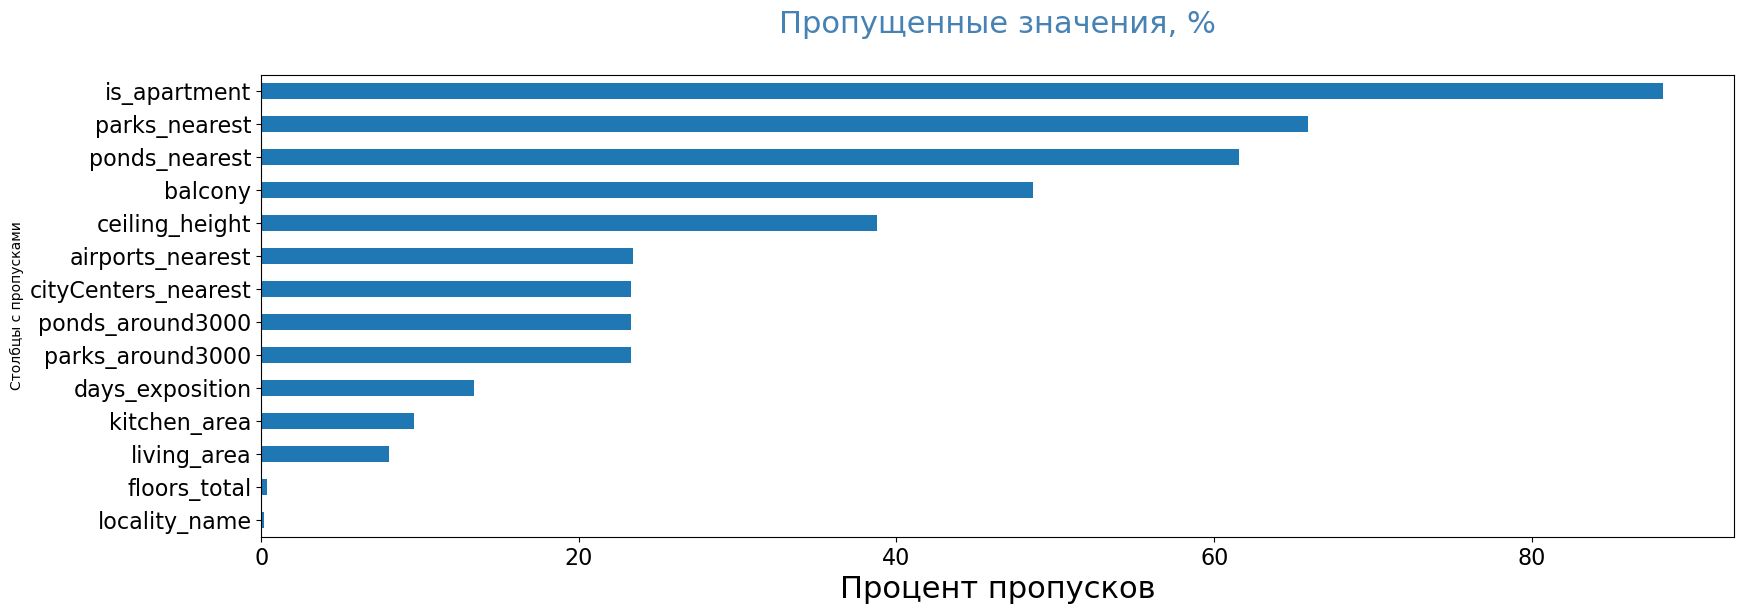

In [4]:
(data.isna().mean()*100)\
        .to_frame()\
        .rename(columns = {0:'space'})\
        .query('space > 0')\
        .sort_values(by = 'space', ascending = True)\
        .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)


plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
plt.xlabel('Процент пропусков', fontsize=22)
plt.ylabel('Столбцы с пропусками')

In [4]:
#Заполним пропуски в столбцах "балконы", "парки/пруды в радиусе 3 км" нулями
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Пропуски в столбце с балконами заполнили нулями, т к вероятнее всего, отсутствие значений в этих ячейках говорит о том, что балконов нет.
Пропуски в столбце "Количество парков/прудов" в радиусе тоже заполняем нулями. 

Пропуски возможны по причине отсутствия локации, т к значения в этих ячейках считаются автоматически. Почти 60% объектов из базы находятся за городом, где в большинстве случаев находятся лесные массивы, поэтому, скорее всего, наличие парков поблизости у таких объектов не критично (если рядом лес, парки не нужны). 

Заполнять пропущеные значения в столбце living_area расчетными синтетическими значениями (на основе среднего, медианы) не корректно, т к в базе находятся объекты разного формата: студии, загородные дома, дачные дома, многокомнатные апартаменты в центре города. Поэтому корректно заполнить средним или медианой не получится. 

Заполним пропуски в столбце жилой площади методом линейной регрессионной модели, чтобы заполнение пропусков происходило на основе выявления зависимостей с другими признаками.


In [5]:
# создаем объект класса StandardScaler
scaler = StandardScaler()

#Создадим таблицу, в которой собраны значения, максимально влияющие на значение жилой площади. 
data_area = data[['total_area','living_area','rooms', 'last_price']]

# посмотрим на результат
data_area.head()
data_area.shape

(23699, 4)

По логике в новую таблицу нужно было бы добавит столбец kitchen_area, но поскольку в столбце kitchen_area почти 10% пропусков, мы его не берем. Для оценки значений в столбце living_area нужно брать столбцы без пропусков.

В тестовую выборку мы поместим те наблюдения, в которых в столбце living_area есть пропуски

In [6]:
test = data_area[data_area['living_area'].isnull()]
print(test.head())
# посмотрим на количество таких строк
print('Количество строк с пропусками в living_area:')
test.shape

    total_area  living_area  rooms  last_price
3        159.0          NaN      3  64900000.0
7         71.6          NaN      2   7915000.0
30        32.8          NaN      1   2200000.0
37        45.8          NaN      2   1990000.0
44        40.0          NaN      1   5350000.0
Количество строк с пропусками в living_area:


(1903, 4)

В обучающую выборку поместим строки, где в living_area пропусков нет.

In [7]:
# используем метод .dropna(), чтобы избавиться от пропусков
train = data_area.dropna()
 
# оценим количество строк без пропусков
print('Количество строк без пропусков в living_area:')
train.shape

Количество строк без пропусков в living_area:


(21796, 4)

Нужно проверить сумму строк в тестовом и обучающем датафреймах и убедиться, что сумма равна сумме строк в исходной таблице.

In [8]:
len(test)+len(train)

23699

Из датафрейма train выделим столбец living_area. Это будет наша целевая переменная.

In [9]:
# целевая переменная может быть в формате Series
y_train = train['living_area']
 
# также не забудем удалить столбец living_area из датафрейма признаков
x_train = train.drop('living_area', axis = 1)
 
# в test столбец living_area не нужен
x_test = test.drop('living_area', axis = 1)

# на этих признаках мы будем учить нашу модель
print(x_train.head())

   total_area  rooms  last_price
0       108.0      3  13000000.0
1        40.4      1   3350000.0
2        56.0      2   5196000.0
4       100.0      2  10000000.0
5        30.4      1   2890000.0


In [10]:
# это будет нашей целевой переменной
y_train.head()

0    51.0
1    18.6
2    34.3
4    32.0
5    14.4
Name: living_area, dtype: float64

In [11]:
# на этих данных мы будем строить прогноз (заполнять пропуски)
x_test.head()

,total_area,rooms,last_price
3,159.0,3,64900000.0
7,71.6,2,7915000.0
30,32.8,1,2200000.0
37,45.8,2,1990000.0
44,40.0,1,5350000.0


Обучение модели и заполнение пропусков

In [12]:
# создадим объект этого класса
data_area_model = LinearRegression()
 
# обучим модель
data_area_model.fit(x_train, y_train)
 
# применим обученную модель к данным, в которых были пропуски в столбце living_area
y_pred = data_area_model.predict(x_test)
 
# посмотрим на первые пять прогнозных значений
y_pred[:5]

array([85.13238911, 39.18012795, 15.66418422, 27.57219853, 18.92488187])

Пропущенные значения заполнены. Соединим тестовый и обучающий датафреймы.

In [13]:
# присоединим прогнозные значения жилой площади к датафрейму test
test['living_area'] = y_pred
print(test.head())

    total_area  living_area  rooms  last_price
3        159.0    85.132389      3  64900000.0
7         71.6    39.180128      2   7915000.0
30        32.8    15.664184      1   2200000.0
37        45.8    27.572199      2   1990000.0
44        40.0    18.924882      1   5350000.0


C:\Users\babay\AppData\Local\Temp\ipykernel_19012\1935434550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['living_area'] = y_pred


Теперь у нас есть два датафрейма train и test со столбцом living_area с заполненными пропусками.

In [14]:
train.head()

,total_area,living_area,rooms,last_price
0,108.0,51.0,3,13000000.0
1,40.4,18.6,1,3350000.0
2,56.0,34.3,2,5196000.0
4,100.0,32.0,2,10000000.0
5,30.4,14.4,1,2890000.0


Соединим их методом с помощью функции pd.concat()

In [15]:
data_area = pd.concat([train, test])
data_area.head()

,total_area,living_area,rooms,last_price
0,108.0,51.0,3,13000000.0
1,40.4,18.6,1,3350000.0
2,56.0,34.3,2,5196000.0
4,100.0,32.0,2,10000000.0
5,30.4,14.4,1,2890000.0


По сравнению с изначальным датафреймом порядок строк нарушился. Восстановим индексацию.

In [16]:
# восстановим изначальный порядок строк, отсортировав их по индексу
data_area.sort_index(inplace = True)
data_area.head()

,total_area,living_area,rooms,last_price
0,108.0,51.000000,3,13000000.0
1,40.4,18.600000,1,3350000.0
2,56.0,34.300000,2,5196000.0
3,159.0,85.132389,3,64900000.0
4,100.0,32.000000,2,10000000.0


Убедимся в отсутствии пропусков и посмотрим на размеры получившегося датафрейма.

In [17]:
print(data_area['living_area'].isna().sum())
print(data_area.shape)

0
(23699, 4)


Заменим значения столбца living_area в исходной таблице и проверим получившуюся таблицу на наличие пропусков.

In [18]:
data['living_area'] = data_area['living_area']
print('Пропусков после заполения ячеек: ', data['living_area'].isna().sum())

Пропусков после заполения ячеек:  0


Проверим заполненные пропуски на корректность, задав условие проверки total_area*0.95<=(living_area+kitchen_area)

In [19]:
print('Количество строк, заполненных не корректно: ', len(data.query('total_area*0.95<=(living_area+kitchen_area)')))

Количество строк, заполненных не корректно:  251


При заполнении пропущенных значений living_area с помощью линейной регрессионной модели получаем 251 строку, заполненную не корректно.
Зададим функцию, которая уменьшит площадь living_area для ячеек, заполненных не корректно, на 15%. Если 95% общей площади меньше, чем сумма жилой площади и площади кухни, функция уменьшает жилую площадь на 15%.                                                                                                                                         

In [20]:
#Задаем функцию, которая проверяет некорректность значений в столбце living_area и 
#меняет некорректные значения, уменьшив их на 20%
def living_area_correct(row):
    if row['total_area']*0.95<=(row['living_area']+row['kitchen_area']):
        return row['living_area']*0.85
    else:
        return row['living_area']

#применим функцию к столбцу living_area
data['living_area'] = data.apply(living_area_correct, axis = 1)
print('Количество строк, заполненных не корректно: ', len(data.query('total_area*0.95<=(living_area+kitchen_area)')))

Количество строк, заполненных не корректно:  45


После применения линейной регрессионной модели и функции, корректирующей значения жилой площади, число не корректно заполненных ячеек снизилось до 45 - это 0.16% от общего числа строк. Хороший результат, оставим эти значения.

Аналогичным образом заполним пропуски в столбце kitchen_area 

In [21]:
#Создадим таблицу, в которой собраны значения, максимально влияющие на значение площади кухни. 
data_area_k = data[['total_area','rooms', 'kitchen_area', 'last_price']]

# посмотрим на результат
data_area_k.head()
data_area_k.shape

(23699, 4)

В тестовую выборку поместим строки, в которых в kitchen_area есть пропуски

In [22]:
test_k = data_area_k[data_area_k['kitchen_area'].isnull()]
print(test_k.head())
# посмотрим на количество таких строк
print('Количество строк с пропусками в kitchen_area:')
test_k.shape

    total_area  rooms  kitchen_area  last_price
3        159.0      3           NaN  64900000.0
30        32.8      1           NaN   2200000.0
37        45.8      2           NaN   1990000.0
44        40.0      1           NaN   5350000.0
59        46.5      1           NaN   6300000.0
Количество строк с пропусками в kitchen_area:


(2278, 4)

В обучающую выборку поместим строки, в которых пропусков в kitchen_area нет

In [23]:
# используем метод .dropna(), чтобы избавиться от пропусков
train_k = data_area_k.dropna()
 
# оценим количество строк без пропусков
print('Количество строк без пропусков в kitchen_area:')
train_k.shape

Количество строк без пропусков в kitchen_area:


(21421, 4)

Проверим сумму строк в тестовом и обучающем датафреймах, посмотрим, равна ли она сумме строк в исходной таблице

In [24]:
len(test_k)+len(train_k)

23699

Выделим столбце kitchen_area, это будет целевая переменная

In [25]:
# целевая переменная
y_train_k = train_k['kitchen_area']
 
# также не забудем удалить столбец kitchen_area из датафрейма признаков
x_train_k = train_k.drop('kitchen_area', axis = 1)
 
# в test столбец kitchen_area не нужен
x_test_k = test_k.drop('kitchen_area', axis = 1)

# на этих признаках мы будем учить нашу модель
print(x_train_k.head())

   total_area  rooms  last_price
0       108.0      3  13000000.0
1        40.4      1   3350000.0
2        56.0      2   5196000.0
4       100.0      2  10000000.0
5        30.4      1   2890000.0


In [26]:
# это будет нашей целевой переменной
y_train_k.head()

0    25.0
1    11.0
2     8.3
4    41.0
5     9.1
Name: kitchen_area, dtype: float64

In [27]:
# на этих данных мы будем строить прогноз (заполнять пропуски)
x_test_k.head()

,total_area,rooms,last_price
3,159.0,3,64900000.0
30,32.8,1,2200000.0
37,45.8,2,1990000.0
44,40.0,1,5350000.0
59,46.5,1,6300000.0


Обучение модели и заполнение пропусков в kitchen_area

In [28]:
# создадим объект этого класса
data_area_k_model = LinearRegression()
 
# обучим модель
data_area_k_model.fit(x_train_k, y_train_k)
 
# применим обученную модель к данным, в которых были пропуски в столбце kitchen_area
y_pred_k = data_area_k_model.predict(x_test_k)
 
# посмотрим на первые пять прогнозных значений
y_pred_k[:5]

array([25.54116429,  8.86287717,  8.34313437, 10.08600616, 11.12187549])

Пропущенные значения в kitchen_area заполнены. Соединим тестовый и обучающий датафреймы.

In [29]:
# присоединим прогнозные значения жилой площади к датафрейму test
test_k['kitchen_area'] = y_pred_k
print(test_k.head())

    total_area  rooms  kitchen_area  last_price
3        159.0      3     25.541164  64900000.0
30        32.8      1      8.862877   2200000.0
37        45.8      2      8.343134   1990000.0
44        40.0      1     10.086006   5350000.0
59        46.5      1     11.121875   6300000.0


C:\Users\babay\AppData\Local\Temp\ipykernel_19012\1973785660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_k['kitchen_area'] = y_pred_k


Соединим train_k и test_k с помощью функции pd.concat()

In [30]:
data_area_k = pd.concat([train_k, test_k])
data_area_k.head()

,total_area,rooms,kitchen_area,last_price
0,108.0,3,25.0,13000000.0
1,40.4,1,11.0,3350000.0
2,56.0,2,8.3,5196000.0
4,100.0,2,41.0,10000000.0
5,30.4,1,9.1,2890000.0


In [31]:
# восстановим изначальный порядок строк, отсортировав их по индексу
data_area_k.sort_index(inplace = True)
data_area_k.head()

,total_area,rooms,kitchen_area,last_price
0,108.0,3,25.000000,13000000.0
1,40.4,1,11.000000,3350000.0
2,56.0,2,8.300000,5196000.0
3,159.0,3,25.541164,64900000.0
4,100.0,2,41.000000,10000000.0


Заменим столбец kitchen_area в исходной таблице на столбец из таблицы с заполненными пропусками.

In [32]:
data['kitchen_area'] = data_area_k['kitchen_area']
print(data['kitchen_area'].isna().sum())

0


Проверим заполненные пропуски на корректность, задав условие проверки total_area*0.95<=(living_area+kitchen_area)

In [33]:
print('Количество строк, заполненных не корректно: ', len(data.query('total_area*0.95<=(living_area+kitchen_area)')))

Количество строк, заполненных не корректно:  349


После заполнения пропусков с помощью модели линейной регрессии количество строк, заполненных не корректно, составило 349.
Здадим функцию, уменьшающую площадь кухни на 25% для строк, заполненных не корректно.

In [34]:
#Задаем функцию, которая проверяет некорректность значений в столбце kitchen_area и 
#меняет некорректные значения, уменьшив их на 20%
def kitchen_area_correct(row):
    if row['total_area']*0.95<=(row['living_area']+row['kitchen_area']):
        return row['kitchen_area']*0.75
    else:
        return row['kitchen_area']

#применим функцию к столбцу kitchen_area
data['kitchen_area'] = data.apply(kitchen_area_correct, axis = 1)
print('Количество строк, заполненных не корректно: ', len(data.query('total_area*0.95<=(living_area+kitchen_area)')))

Количество строк, заполненных не корректно:  212


Число строк, заполененных не корректно, снизилось до 212 - это менее 0.5% строк.



In [35]:
#Изменим тип даных в 'is_apartment' на логический, предварительнт заполнив пропуски значением False
data['is_apartment'] = data['is_apartment'].fillna(value = False).astype('bool')

Заменили тип данных в столбце is_apartment на логический и заменили пропуски на False. Там, где False - не апартамаенты, а квартира.

In [36]:
#Посмотритм, в каких населенных пунктах отсутствует параметр высоты потолков
print('Высота потолка отсутствует в следующих населенных пунктах:')
print(data[data['ceiling_height'].isna() == True]['locality_name'].value_counts().head(30))

Высота потолка отсутствует в следующих населенных пунктах:
locality_name
Санкт-Петербург              5617
посёлок Мурино                322
посёлок Шушары                223
посёлок Парголово             190
деревня Кудрово               177
Гатчина                       158
Выборг                        139
Пушкин                        135
Колпино                       135
Всеволожск                    126
Кудрово                       100
Кингисепп                      76
Красное Село                   66
Сланцы                         63
Петергоф                       56
Сестрорецк                     54
Волхов                         53
деревня Новое Девяткино        47
посёлок Бугры                  47
Ломоносов                      42
Сертолово                      41
Никольское                     39
Тихвин                         38
Сосновый Бор                   36
городской посёлок Янино-1      36
Кириши                         36
Тосно                          34
Кронштадт

Видим, что большая часть (61%) объявлений с пропусками в "потолках" - объекты в Санкт-Петербурге.
Остальные пропущенные значения относительно равномерно распределены по другим городам.
Сгруппируем данные по населенным пунктам, предварительно убрав строки с нулевым значением, и посмотрим 
средние значения высоты потолков в каждом населенном пункте.

In [37]:
data_locality = data[['locality_name', 'ceiling_height']]
data_locality = data_locality[~data_locality['ceiling_height'].isna()]
print('Средняя высота потолков в населенных пунктах:')
print(data_locality.groupby('locality_name')['ceiling_height'].mean().sort_values(ascending = False).head(20))


Средняя высота потолков в населенных пунктах:
locality_name
деревня Нижняя                     27.000000
деревня Мины                       27.000000
поселок Новый Свет                 13.850000
городской поселок Большая Ижора     4.662500
Бокситогорск                        3.900000
Луга                                3.269355
деревня Нурма                       3.200000
посёлок Ропша                       3.200000
Волхов                              3.151207
деревня Ваганово                    3.150000
деревня Глинка                      3.100000
Кронштадт                           3.072500
коттеджный поселок Счастье          3.000000
деревня Каськово                    3.000000
посёлок Лисий Нос                   3.000000
деревня Бор                         2.950000
посёлок Мурино                      2.938900
посёлок городского типа Токсово     2.875000
Санкт-Петербург                     2.803709
Гатчина                             2.781946
Name: ceiling_height, dtype: float64


Видим, что в трех поселках, которые почти не влияют на статистику по пропускам: деревня Нижняя, деревня Мины                  и поселок Новый Свет - высота потолков неадекватная (27 м, 14 м). Уберем эти поселки из выборки и 
посичтаем среднюю высоту потолков после удаления аномальных значений.


In [38]:
data = data[data['locality_name']!='деревня Нижняя']
data = data[data['locality_name']!='деревня Мины']
data = data[data['locality_name']!='поселок Новый свет']
ceiling_mean = data_locality['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_mean)

Поскольку в центре СПБ могут быть объекты с редкими значениями высоты потолков, проверим, есть ли пропуски в значениях ceiling_height в центре города, берем радиус 3 км.

Переведем метры в километры в столбце расстояние до центра.

In [39]:
data['cityCenters_nearest'] = data['cityCenters_nearest']/1000

In [40]:
# check
data['cityCenters_nearest'].head(2)

0    16.028
1    18.603
Name: cityCenters_nearest, dtype: float64

In [41]:
print(data.loc[(data['ceiling_height'].isna())\
               &(data['locality_name']=='Санкт-Петербург')\
               &(data['cityCenters_nearest']<3)].value_counts()
     )

Series([], Name: count, dtype: int64)


Видим, что в центре города отсутсвуют объекты с пропусками в столбце ceiling_height и заполняем пропуски в столбце ceiling_height средним значением.

In [42]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_mean)

In [43]:
#Изменим тип данных в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')


In [44]:
#Изменим формат floors_total на целочисленный, предварительно заменив пропущенные значения в столбце floors_total на медианное.
floors_total_median = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(floors_total_median)
data['floors_total'] = data['floors_total'].astype('int64')
data['floor'] = data['floor'].astype('int64')

Для заполнения не корректно заполенных значений используем функцию, которая будет сравнивать этаж объекта с общим числом этажей и в случае превышения значения этажа общей этажности функция заменит значение этажа.

In [46]:
def correct_floor(row):
    if row['floors_total']<row['floor']:
        return row['floors_total']
    else:
        return row['floor']
    
data['floor'] = data.apply(correct_floor, axis = 1)


In [47]:
#Посмотрим, в каких населенных пунктах отсутствует расстояние до центра и аэропорта
print('Расстояние до центра отсутствует в следующих населенных пунктах:')
print(data[data['cityCenters_nearest'].isna() == True]['locality_name'].value_counts().head(30))


Расстояние до центра отсутствует в следующих населенных пунктах:
locality_name
посёлок Мурино               522
Всеволожск                   398
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Кириши                       125
Сланцы                       112
Волхов                       111
Кингисепп                    104
Тосно                        104
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
Приозерск                     66
деревня Старая                64
городской посёлок Янино-1     61
Санкт-Петербург               61
Шлиссельбург                  57
Луга                          56
Тихвин                        49
поселок Бугры                 45
посёлок Тельмана              

In [48]:
#Посмотрим, есть ли в первых пяти населенных пунктах, где больше всего пропусков в расстоянии, ненулевые значения
print(data[((data['locality_name'] == 'посёлок Мурино')|
      (data['locality_name'] == 'Кириши')|
      (data['locality_name'] == 'Гатчина')|
      (data['locality_name'] == 'деревня Кудрово')|
      (data['locality_name'] == 'Кудрово')|
      (data['locality_name'] == 'Выборг')
     )&(data['cityCenters_nearest'].notnull())])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Видим, что во всех населенных пунктах растояние не указано. Считать его для каждого поселка из списка проблематично,
заменять на среднее значение не корректно для 23% пропусков. 

In [49]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23696 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23696 non-null  int64         
 1   last_price            23696 non-null  float64       
 2   total_area            23696 non-null  float64       
 3   first_day_exposition  23696 non-null  datetime64[ns]
 4   rooms                 23696 non-null  int64         
 5   ceiling_height        23696 non-null  float64       
 6   floors_total          23696 non-null  int64         
 7   living_area           23696 non-null  float64       
 8   floor                 23696 non-null  int64         
 9   is_apartment          23696 non-null  bool          
 10  studio                23696 non-null  bool          
 11  open_plan             23696 non-null  bool          
 12  kitchen_area          23696 non-null  float64       
 13  balcony              

None

Рассмотрим типы данных в кажлм столбце. Информацию о типах данных мы вывели на экран в первой ячейке командой info().
Для начала перечислим, в каких столбцах тип данных указан корректно и менять  его НЕ надо.
В столбце total_images (int64 - для количества фотографий целый тип), last_price (float64 - для цены правильный формат), total_area (для площади float64 правильно), rooms (int64 правильно), ceiling_height (float64 корректно), living area (float64 корректно), floor (int64 корректно), studio (bool правильно), open_plan ( bool правильно), kitchen_area (float64 правильно), balcony (bool правильно), locality_name (object верно), cityCenters_nearest, airports_nearest, parks_nearest, ponds_nearest (для расстояний формат float64 корректен).

Далее рассмотрим, форматы для каких данных укзаны не корректно и укажем, на что нужно заменить.

***1)*** first_day_exposition - указан формат object, поскольку это дата, нужно заменить на формат даты, без времени.

***2)*** Floors_total - указан формат float64, нужно поменять на int, так как количество этажей в доме это целое число.

***3)*** is_apartment - указан тип object. Нужно переделать на bool. Либо это апартаменты (True), либо нет (False). Тогда можно избавиться от пропущенных значений в этом столбце.

***4)*** parks_around3000, ponds_around3000 - указан тип float, по логике нужно поменять на int: число парков лучше измерять целыми числами.

***5)*** days_exposition - указан тип float, нужно поменять на int, в данной задаче дни удобнее измерять целыми числами. Бывают ситуации, когда дни тоже можно измерять в дробях, но это не тот случай.


In [50]:
#почти все типы данных заменили при заполнении пропусков в предыдущей ячейке

data['parks_around3000'] = data['parks_around3000'].round(decimals = 0)
data['ponds_around3000'] = data['ponds_around3000'].round(decimals = 0)
data['balcony'] = data['balcony'].round(decimals = 0)
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['balcony'] = data['balcony'].astype('Int64')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23696 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23696 non-null  int64         
 1   last_price            23696 non-null  float64       
 2   total_area            23696 non-null  float64       
 3   first_day_exposition  23696 non-null  datetime64[ns]
 4   rooms                 23696 non-null  int64         
 5   ceiling_height        23696 non-null  float64       
 6   floors_total          23696 non-null  int64         
 7   living_area           23696 non-null  float64       
 8   floor                 23696 non-null  int64         
 9   is_apartment          23696 non-null  bool          
 10  studio                23696 non-null  bool          
 11  open_plan             23696 non-null  bool          
 12  kitchen_area          23696 non-null  float64       
 13  balcony              

In [51]:
data['days_exposition'] = data['days_exposition'].apply(np.round).astype('Int64', errors='ignore')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23696 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23696 non-null  int64         
 1   last_price            23696 non-null  float64       
 2   total_area            23696 non-null  float64       
 3   first_day_exposition  23696 non-null  datetime64[ns]
 4   rooms                 23696 non-null  int64         
 5   ceiling_height        23696 non-null  float64       
 6   floors_total          23696 non-null  int64         
 7   living_area           23696 non-null  float64       
 8   floor                 23696 non-null  int64         
 9   is_apartment          23696 non-null  bool          
 10  studio                23696 non-null  bool          
 11  open_plan             23696 non-null  bool          
 12  kitchen_area          23696 non-null  float64       
 13  balcony              

In [53]:
#Смотрим уникальные значения в столбцах
print(data['locality_name'].unique())
data.locality_name.nunique()

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

362

In [54]:
#заменим неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок', regex=True)
print(data['locality_name'].unique())
data.locality_name.nunique()

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'посёлок городского типа Красный Бор' 'Гатчина' 'деревня Фёдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'посёлок Металлострой' 'посёлок городского типа Лебяжье'
 'посёлок городского типа Сиверский' 'посёлок Молодцово'
 'посёлок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

328

Проверим список с оставшимися названиями на дубликаты.

In [55]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', '', regex=True)
data['locality_name'] = data.locality_name.str.replace('городской посёлок', '')
data['locality_name'] = data.locality_name.str.replace('деревня', '')
print('Осталось уникальных значений названий населенных пунктов ',data.locality_name.nunique())     
                              
                              

Осталось уникальных значений названий населенных пунктов  320


***Итоги предобработки данных:***

***1) Работа с пропусками***. 

Мы сделали замену пропусков в следующих столбцах: 

а) пропуски в столбце balcony заменили нулями, т к отсутсвие значения в этом столбце означает в большинстве случаев отсутствие балкона.

б) Пропуски в столбцахз living_area и kitchen_area заполнили значениями, рассчитанными с помощью линейной регрессионной модели, т к  логично наличие линейной зависимости между жилой площадью (значения которой заполнены во всех строках) и общей площадью, между общей площадью и площадью кухни. 

в) Пропуски в столбце is_apartment заменили нулями, предварительно поменяв тип данных на логический. Ноль в этих ячейках будет означать, что объект является квартирой, а не апартаментами. 

г) Пропуски в высоте потолков заменили средними значениями, предварительно избавившись от аномальных значений (13, 25 м) и убедившись, что пропусков нет в исторической части города, где могут встречаться достаточно высокие потолки (5-8 м).

Оставили пропуски в столбцах parks/ponds_around3000, отсутствие значений в этих столбцах объясняется отсутствием точной локации (например, указано название поселка без указания улицы). Более 60% объектов в базе находятся за городом, рядом с лесными массивами, поэтому наличие парков/прудов в радиусе 3 км для этих объектов не актуально. По той же причине оставляем пропуски в столбцах с расстоянием до ближайшего парка/пруда. Расстояние до центра города и ближашего аэропрота (aeroport_nearest, cityCenters_nearest) отсуствует тоже по причине отстутсвия точной локации, процент пропусков в этих столбцах такой же, что и в столбцах parks/ponds_around3000

Отельно нужно выделить пропуски в столбце days_exposition, в котором указано количество дней от даты размещения объявления до дня снятия. Для анализа данных в дальнейшем будет необходима информация о сроках продажи квартир, поэтому можно оставить пропуски для проведения анализа и не учитывать строки с пропусками, т к нас интересуют только проданные объекты. Если бы мы смотрели просто срок размещения объявлений, в т ч по непроданным объектам, то можно было бы рассчитать срок объявления как разницу между сегодняшним днем и датой размещения. 

***2) Изменение типов данных***

Заменили тип данных в ячейках floors_total, days_exposition, parks/ponds_around3000 на целочисленный (число этажей, дней размещения объявления, количество парков/прудов логичнее измерять целыми значениями), в столбце is_apartment  тип данных заменили на логический (объект или явяляется апартаментами, или нет). Типы данных в остальных ячейках оставили без изменения. 

***3)*** Удалилти неявные дулбикаты. Убрали слова "поселок", "поселок городского типа", "деревня", "СНТ", сохранив названия.





### Исследовательский анализ данных

Добавим столбец с ценой 1 кв метра и день недели публикации

In [56]:
#добавим столбец с ценой 1 кв метра
data['one_metr_price'] = data['last_price']/data['total_area']
data['one_metr_price'].astype('int')
#добавим день недели публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


Зададим функцию, которая определяет тип этажа квартиры

In [57]:
#Зададим функцию, которая определяет тип этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'Первый этаж'
    if row['floor'] == row['floors_total']:
        return 'Последний этаж'
    if row['floor'] <=0:
        return 'Ошибка в данных'
    else:
        return 'Другой этаж'

Добавление столбцов для анализа

In [58]:
#Добавим столбец  с категорией этажности
data['floor_group'] = data.apply(floor_type, axis = 1)

#расстояние от центра города в км
data['center_distance'] = round(data['cityCenters_nearest'], 0)

#roundplaces = np.round(data['center_distance'], 
                      #decimals = 0)  
data['center_distance'].describe()

count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: center_distance, dtype: float64

Проверим  столбец этажа на аномалии (нулевой или отрицательное значение этажа)

In [59]:
print(data.loc[data['floor']<=0].value_counts())

Series([], Name: count, dtype: int64)


***Общая площадь объектов***

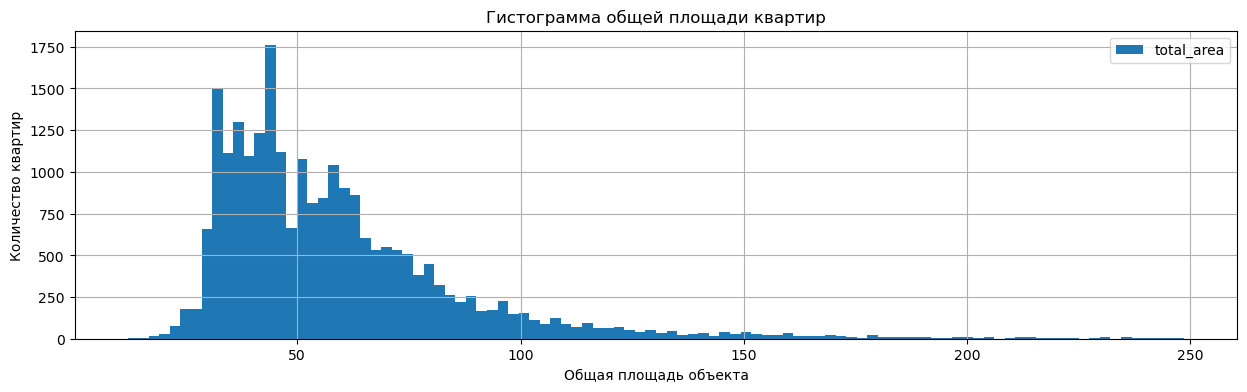

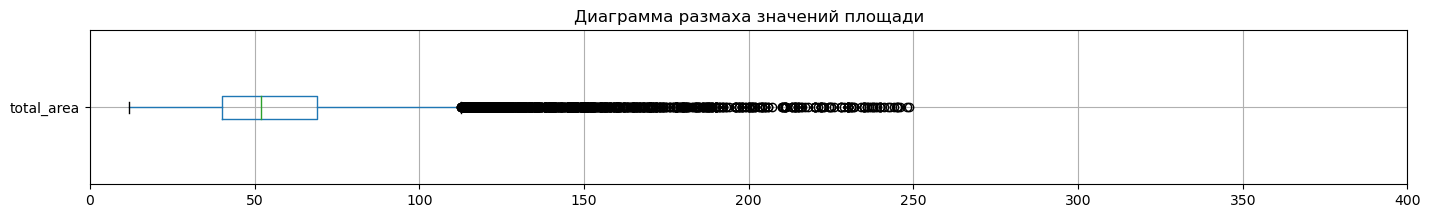

Статистика: count    23577.000000
mean        58.930680
std         28.711714
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        248.700000
Name: total_area, dtype: float64


In [68]:
data['total_area'].plot(kind = 'hist', title = 'Гистограмма общей площади квартир', xlabel = 'Общая площадь объекта',\
                        ylabel = 'Количество квартир',  bins = 100,\
                        figsize = (15, 4), grid = True, legend = True)

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400)
plt.show();

#выведем максимальное, минимальное значения и значения квартилей (первый, медиану и третий)
print('Статистика:', data['total_area'].describe())


На графиках видно, что дальше площади 200 м2 узкий "хвост" гистограммы очень близок к нулю, и значения выше сильно отличаются от средних.
Видим довольно высокое среднеквадратическое отклонение, из-за чего довольно много значений сильно выбиваются из общей картины. Посмотрим значение площади, которую не превышает 99,5% объектов.

In [64]:
#Выведем на экран значение, которое отделяет 99,5% всех квартир от 0,5%, площадь которых сильно выбивается из общей картины
data['total_area'].quantile([0.995])
print('99,5% квартир имеют площадь менее ', data['total_area'].quantile([0.995]))

99,5% квартир имеют площадь менее  0.995    248.8575
Name: total_area, dtype: float64


In [65]:
#Имеет смысл убрать из таблицы квартиры площадью больше 249 м2
data = data.loc[data['total_area']< 249]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23577 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23577 non-null  int64         
 1   last_price            23577 non-null  float64       
 2   total_area            23577 non-null  float64       
 3   first_day_exposition  23577 non-null  datetime64[ns]
 4   rooms                 23577 non-null  int64         
 5   ceiling_height        23577 non-null  float64       
 6   floors_total          23577 non-null  int64         
 7   living_area           23577 non-null  float64       
 8   floor                 23577 non-null  int64         
 9   is_apartment          23577 non-null  bool          
 10  studio                23577 non-null  bool          
 11  open_plan             23577 non-null  bool          
 12  kitchen_area          23577 non-null  float64       
 13  balcony              

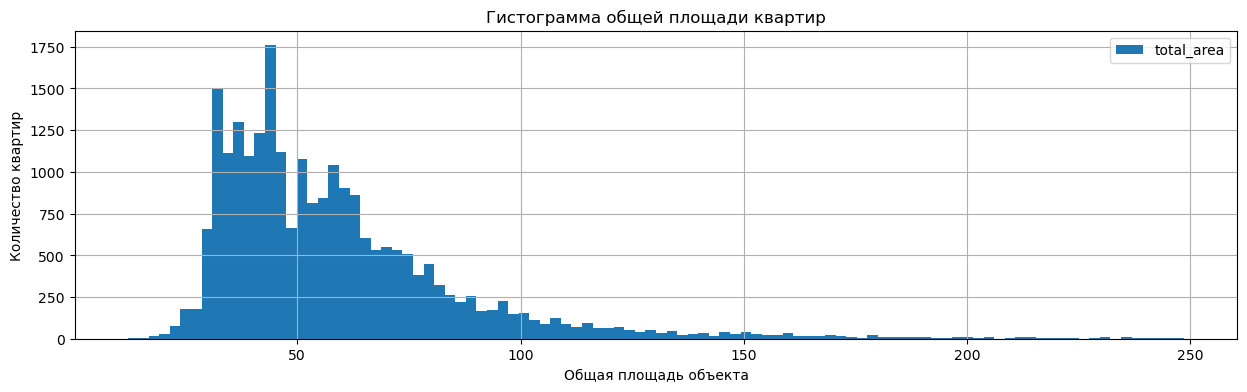

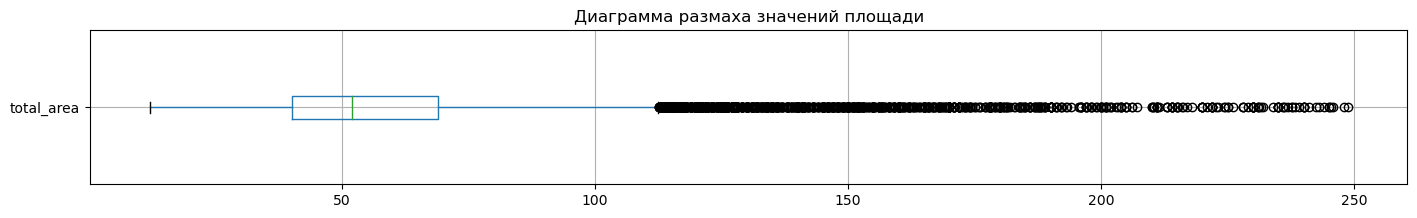

Статистика: count    23577.000000
mean        58.930680
std         28.711714
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        248.700000
Name: total_area, dtype: float64


In [67]:
#Построим гистограмму и диаграмму размаха после удаления аномальных значений
data['total_area'].plot(kind = 'hist', title = 'Гистограмма общей площади квартир', xlabel = 'Общая площадь объекта',\
                        ylabel = 'Количество квартир',  bins = 100,\
                        figsize = (15, 4), grid = True, legend = True)

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
plt.show();

#выведем максимальное, минимальное значения и значения квартилей (первый, медиану и третий)
print('Статистика:', data['total_area'].describe())


***Вывод по параметру площади квартиры***
В исходных данных имело место очень высокое среднеквадратическое отклонение  - 35м2. На первоначальной гистограмме видно, что количество квартир с площадью более 250 м2 ничтожно мало.
Поэтому я решила убрать квартиры с площаью выше 249 м2, оставив 99,5% объектов и отсеяв 0,5% оъектов, площадь которых была больше 0.995 квантиля.
После удаления 0,5%% строк, в которых параметр площадь квартиры был более 249 м2, значения квартилей и медианы почти не поменялись, а среднеквадратическое отклоенение снизилось на 20% (с 35м2 до 28 м2), что снизило разброс значений. После удаления 0,5% строк диаграмма размаха стала более наглядной.



***Жилая площадь объектов***

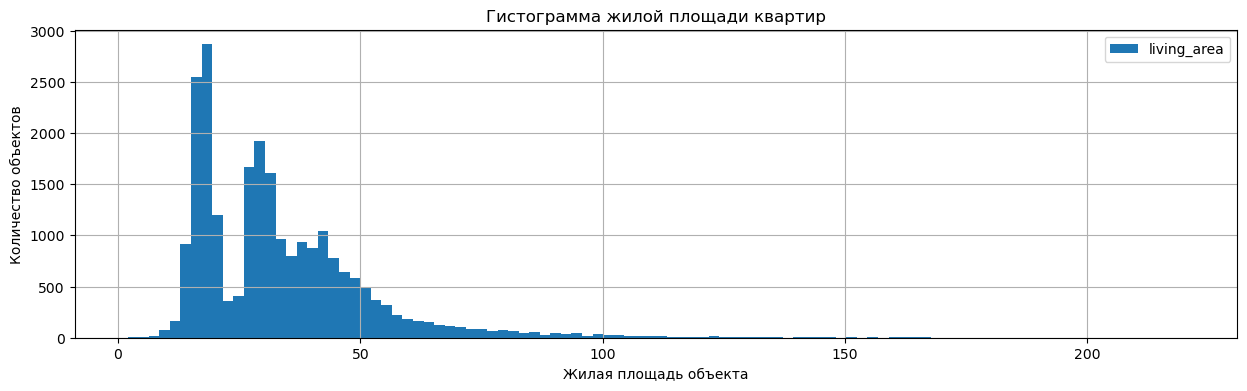

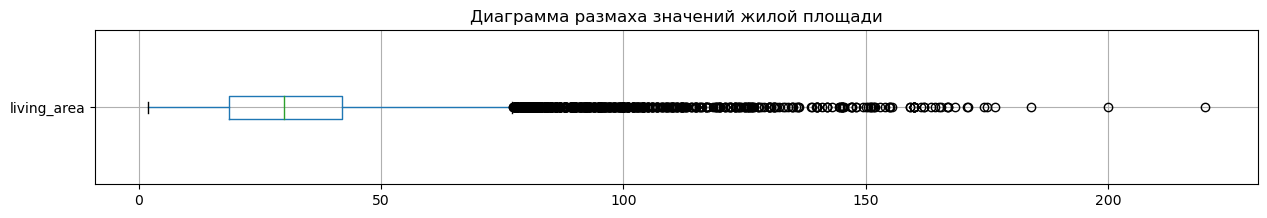

Статистика: count    23577.000000
mean        33.707857
std         18.777239
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        220.000000
Name: living_area, dtype: float64


In [69]:
#строим гистограмму для жилой площади квартир
data['living_area'].plot(kind = 'hist', title = 'Гистограмма жилой площади квартир', xlabel = 'Жилая площадь объекта',\
                         ylabel = 'Количество объектов', bins = 100, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
plt.show();

print('Статистика:', data['living_area'].describe())

Имеет смысл удалить данные с жилой площадью менее 10 м2, т к на гистограмме количество таких квартир ничтожно мало, и 
мало кого интересуют квартиры с жилой площадью менее 10 м2.
На гистограмме и диаграмме размаха видно, что количество объектов с жилой площадью более 150 м2 тоже ничтожно мало.
Просмотрим значение 0,997 квантиля жилой площади. 

In [70]:
print(data['living_area'].quantile(0.997))

138.85440000000017


In [71]:
#Уберем квартиры с жилой площадью менее 10 м2 и более 134 м2
data = data.loc[data['living_area']<134]
data = data.loc[data['living_area']>10]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23415 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23415 non-null  int64         
 1   last_price            23415 non-null  float64       
 2   total_area            23415 non-null  float64       
 3   first_day_exposition  23415 non-null  datetime64[ns]
 4   rooms                 23415 non-null  int64         
 5   ceiling_height        23415 non-null  float64       
 6   floors_total          23415 non-null  int64         
 7   living_area           23415 non-null  float64       
 8   floor                 23415 non-null  int64         
 9   is_apartment          23415 non-null  bool          
 10  studio                23415 non-null  bool          
 11  open_plan             23415 non-null  bool          
 12  kitchen_area          23415 non-null  float64       
 13  balcony              

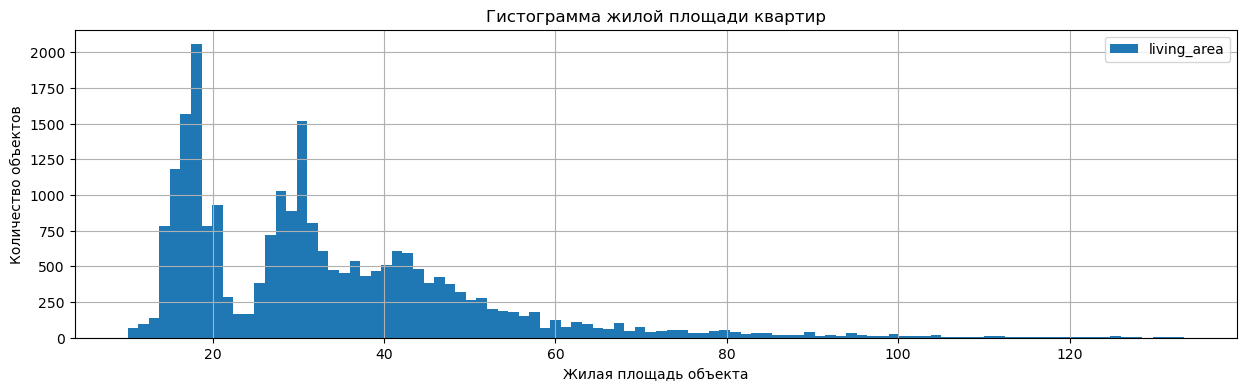

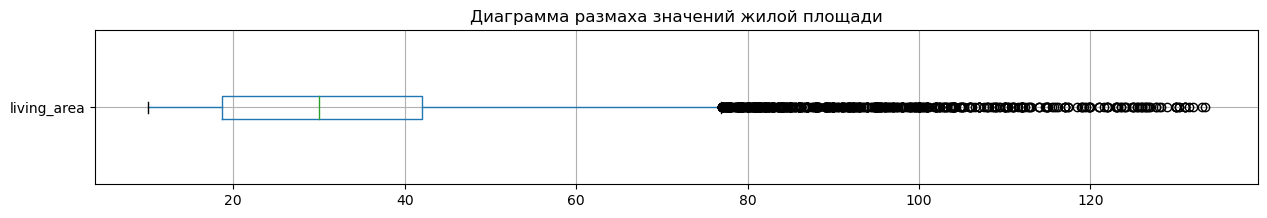

Статистика: count    23415.000000
mean        33.387470
std         17.406644
min         10.080000
25%         18.700000
50%         30.000000
75%         42.000000
max        133.400000
Name: living_area, dtype: float64


In [72]:
#Построим графики после удаления аномальных значений
data['living_area'].plot(kind = 'hist', title = 'Гистограмма жилой площади квартир', xlabel = 'Жилая площадь объекта',\
                         ylabel = 'Количество объектов', bins = 100, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
plt.show();

print('Статистика:', data['living_area'].describe())

***Вывод по статистике жилой площади квартир***
Средняя жилая площадь до удаления выбросов составляли 29 м2, минимальная и максимальная - 2 м2 и 220 м2. 
После удаления лишних значений средние и квартилные значения не поменялись, а минимальное и максимальное стали 10 м2 и 133 м2.
Графики стали более наглядными. 

***Площадь кухни***

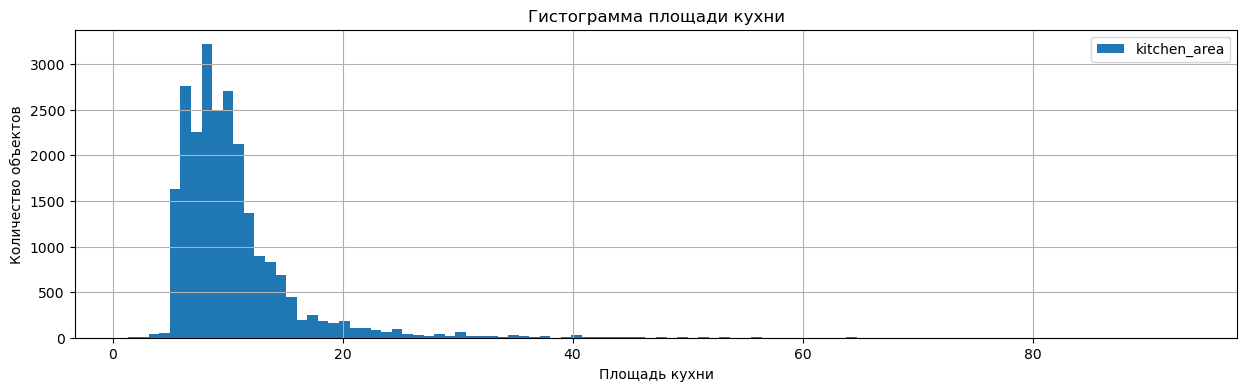

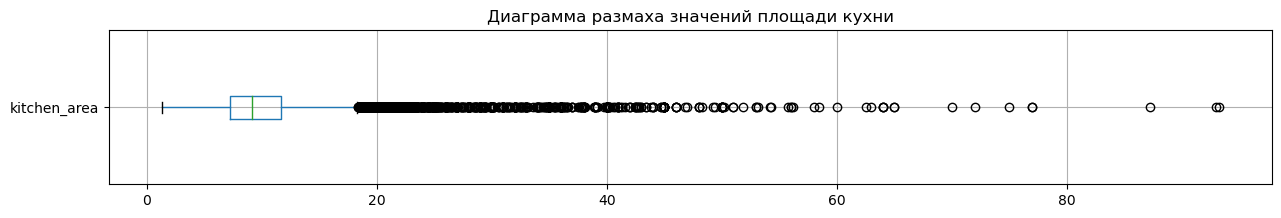

Статистика: count    23415.000000
mean        10.346702
std          5.254531
min          1.300000
25%          7.177436
50%          9.103894
75%         11.630000
max         93.200000
Name: kitchen_area, dtype: float64


In [73]:
#строим гистограмму для площади кухни
data['kitchen_area'].plot(kind = 'hist', title = 'Гистограмма площади кухни', xlabel = 'Площадь кухни',\
                           ylabel = 'Количество объектов', bins = 100, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни')
plt.show();

print('Статистика:', data['kitchen_area'].describe())

Видим аномальное значения площади 1м2 для кухни, которое нужно удалить. Дальше 40 м2 хвост гистограммы почти сливается с нулем. Посмотрим, меньше какого значения площади кухни имеют 99,7% объектов.

In [74]:
print(data['kitchen_area'].quantile(0.997))

42.951600000000326


Уберем кухни с площадью менее 5 м2 и более 43 м2.

In [75]:
data = data.loc[data['kitchen_area']<43]
data = data.loc[data['kitchen_area']>=5]

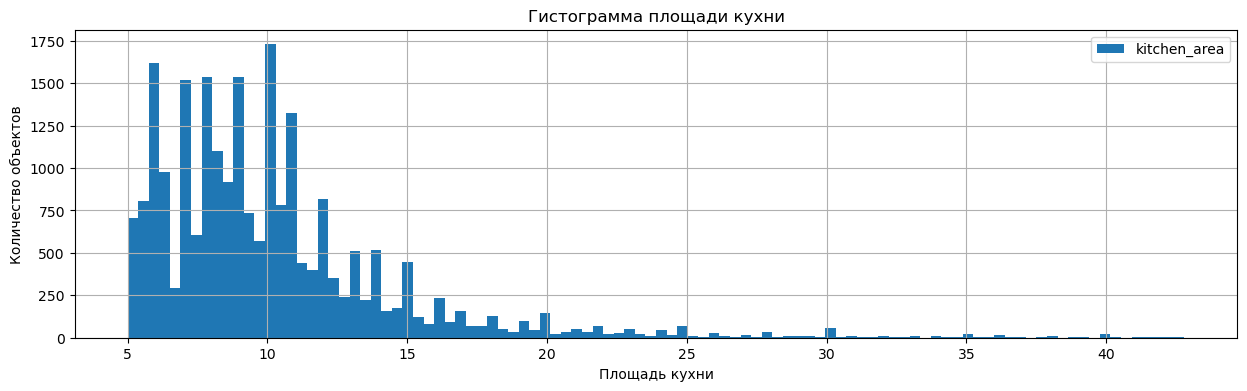

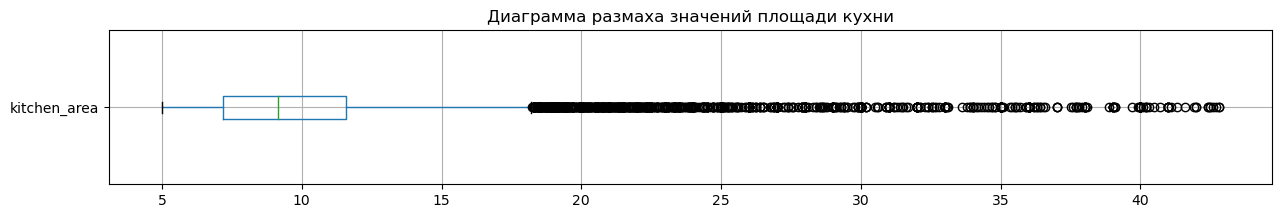

Статистика: count    23223.000000
mean        10.247174
std          4.630557
min          5.000000
25%          7.200000
50%          9.150176
75%         11.600000
max         42.800000
Name: kitchen_area, dtype: float64


In [77]:
#строим графики по обновленным данным
data['kitchen_area'].plot(kind = 'hist', title = 'Гистограмма площади кухни', xlabel = 'Площадь кухни',\
                           ylabel = 'Количество объектов', bins = 100, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни')
plt.show();

print('Статистика:', data['kitchen_area'].describe())

После удаления нестандартных значений на 1 м2 снизился разброс значений, средние и квартильные значения не поменялись.

***Цена объектов***

Для анализа цен переведем цены в миллионы.

In [78]:
data['last_price'] = data['last_price']/1000000

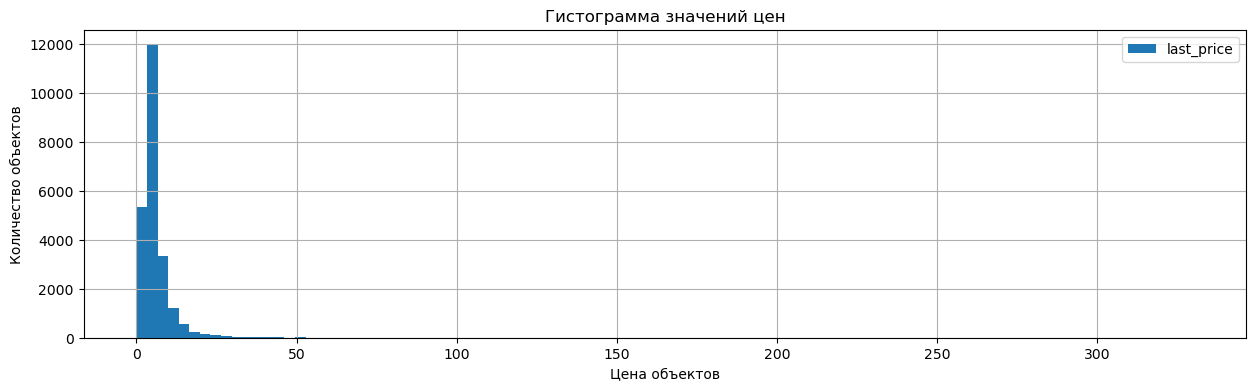

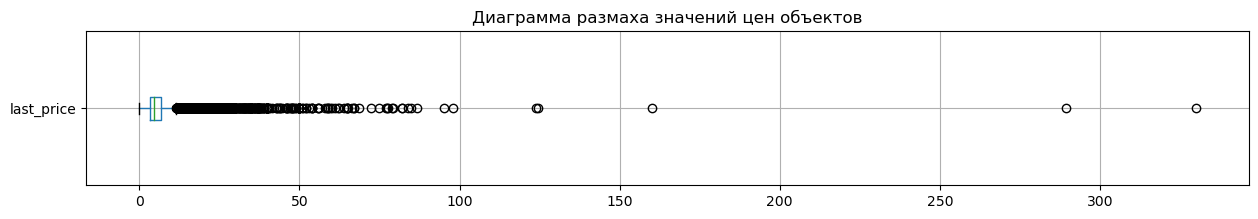

Статистика: count    23223.000000
mean         6.012888
std          6.179078
min          0.012190
25%          3.420000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64


In [79]:
#строим гистограмму для цены

data['last_price'].plot(kind = 'hist', title = 'Гистограмма значений цен', xlabel = 'Цена объектов',\
                           ylabel = 'Количество объектов', bins = 100, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений цен объектов')
plt.show();

print('Статистика:', data['last_price'].describe())

При среднем значении 4,65 млн и среднекв отклонении 6,2 млн квартиры с аномально выоской стоимостью (максимальная стоимость 330 млн.руб.) мешают воспринимать статистику на графике. Посмотрним, в каком ценовом диапазоне находятся 99,5% квартир.

In [80]:
print('99,7% квартир имеют стоимость ниже ', round(data['last_price'].quantile(0.997), 3), 'млн рублей')

99,7% квартир имеют стоимость ниже  44.167 млн рублей


Видим, что в данных есть объект стоиомстью 12 тыс. руб. Явно это ошибка, поэтому нужно установить нижний предел стоимости квартиры в Ленинградской области. По базе Циан минимальная стоимость жилой недвижимости в Ленинградской области составляет 0,5 млн. Т к в базе, которую мы рассматриваем, данные за 2014-2019 гг, можем снизить предел минимальной стоимости до 0.45 млн.руб.
Посмотрим количество объектов стоиомостью менее 0.45 млн.руб.

In [85]:
data_price = data.loc[data['last_price']<=0.45]
data_price.shape

(8, 28)

Видим, что колиичество объектов стоимостью меньшей или равной 0,45 млн. руб. составляет 8, это не критично, и такие цены можно счиатать аномально низкими, удалим объекты стоимостью менее 0.45 млн.руб. и более 45 млн руб. 

In [81]:
#удалим объекты стоимостью ниже 0,45 млн.руб. и выше 45 млн рублей
data = data.loc[data['last_price']<45]
data = data.loc[data['last_price']>=0.45]

Строим графики после удаления аномалий

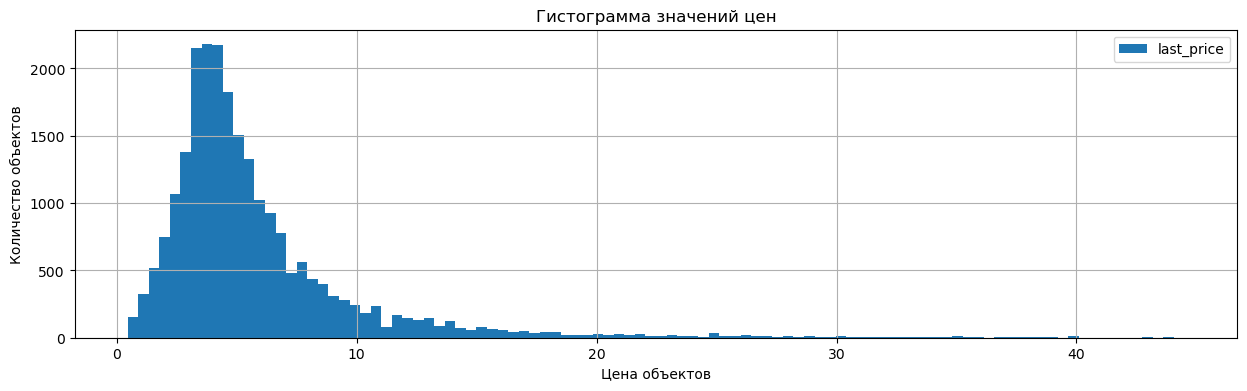

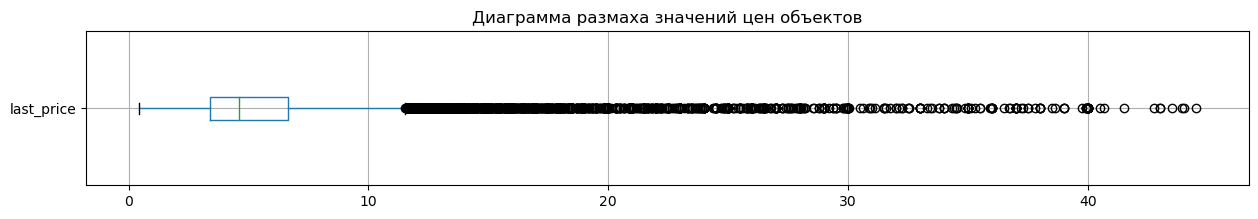

Статистика: count    23150.000000
mean         5.819607
std          4.390018
min          0.450000
25%          3.400000
50%          4.600000
75%          6.650000
max         44.500000
Name: last_price, dtype: float64


In [82]:
data['last_price'].plot(kind = 'hist', title = 'Гистограмма значений цен', xlabel = 'Цена объектов',\
                           ylabel = 'Количество объектов', bins = 100, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений цен объектов')
plt.show();

print('Статистика:', data['last_price'].describe())

После удаления 0,5% квартир, стоимость которых составляла более 45 млн руб. среднекв отклоенение снизилось с 11 до 4,4 млн руб. средние значения не поменялись. График стал наглядным. Видно, что большинство объектов имеет стоимость менее 20 млн.руб.

***Число комнат***

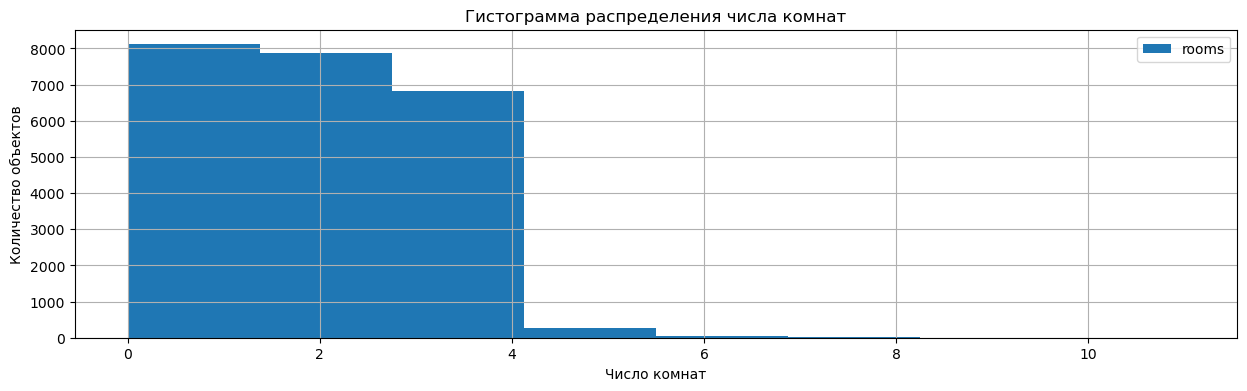

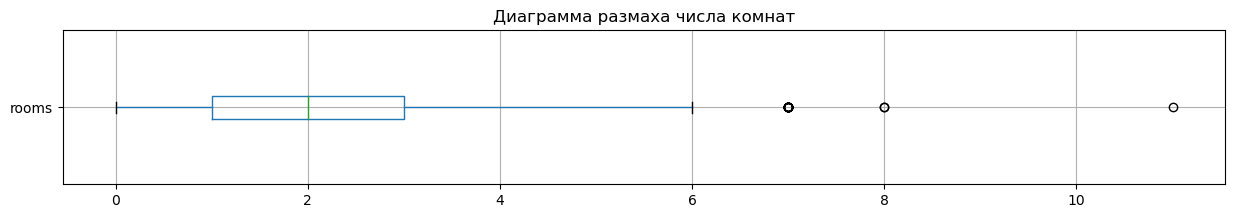

Статистика: count    23150.000000
mean         2.033477
std          0.990147
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


In [83]:
#Построим гистограммы для количества комнат
data['rooms'].plot(kind = 'hist', title = 'Гистограмма распределения числа комнат', xlabel = 'Число комнат',\
                           ylabel = 'Количество объектов', bins = 8, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха числа комнат')
plt.show();


print('Статистика:', data['rooms'].describe())

Стандартно среднее количество комнат 2, минимальное 0 - это студии, а максимальное количесвто комнат  - 11, это очень не стандартная квартира. Видим, что количество комнат больше 7 - это большая редкость. Посмотрим 99,9% квантиль.

In [84]:
print('Количество комнат в 99,9% квартир: ', int(data['rooms'].quantile(0.999)))

Количество комнат в 99,9% квартир:  6


Уберем квартиры с количеством комнат более 6 и построим графики по обновленным данным.

In [85]:
data = data.loc[data['rooms']<=6]

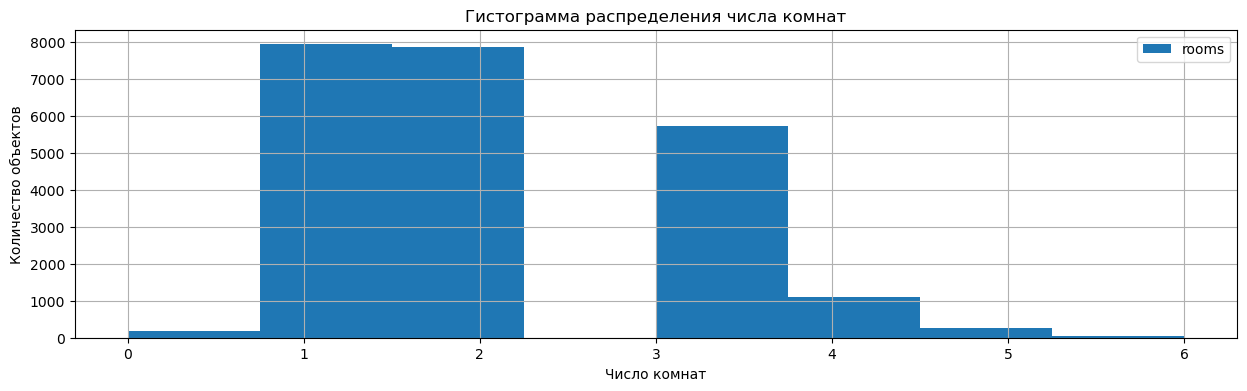

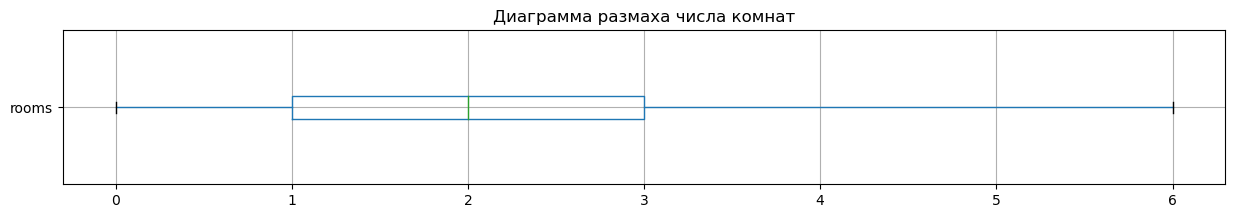

Статистика: count    23126.000000
mean         2.028064
std          0.975922
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


In [86]:
#Построим гистограммы для количества комнат
data['rooms'].plot(kind = 'hist', title = 'Гистограмма распределения числа комнат', xlabel = 'Число комнат',\
                           ylabel = 'Количество объектов', bins = 8, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха числа комнат')
plt.show();


print('Статистика:', data['rooms'].describe())

После удаления аномалий графики стали более наглядными.

***Высота потолков***

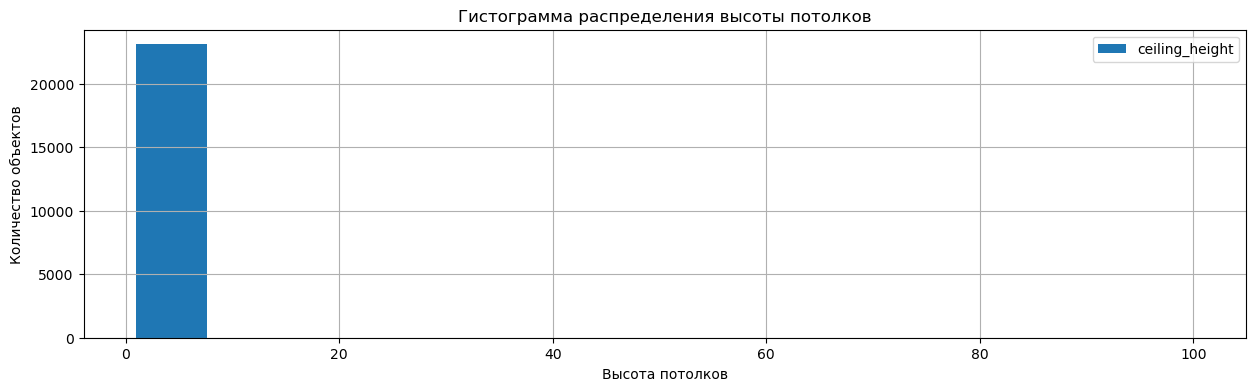

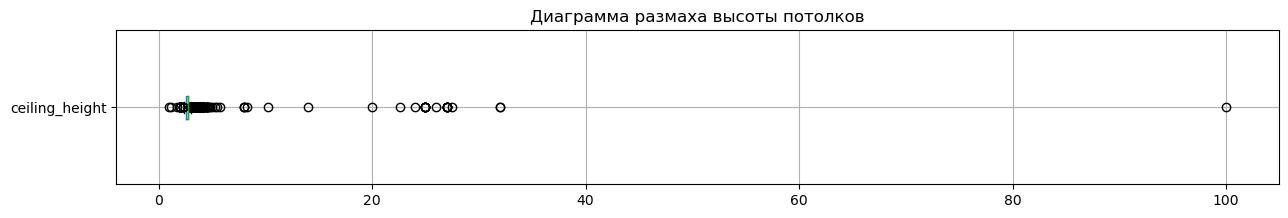

Статистика: count    23126.000000
mean         2.764179
std          0.969739
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64


In [87]:
#Построим гистограммы для высоты потолков
data['ceiling_height'].plot(kind = 'hist', title = 'Гистограмма распределения высоты потолков', xlabel = 'Высота потолков',\
                           ylabel = 'Количество объектов', bins = 15, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха высоты потолков')
plt.show();

print('Статистика:', data['ceiling_height'].describe())

In [88]:
print('99,9% объектов имеют высоту потолка менее ', round(data['ceiling_height'].quantile(0.999), 1), 'метров.')

99,9% объектов имеют высоту потолка менее  8.3 метров.


Посмотрим квартиры с аномально высокими потолками (более 20 м).

In [89]:
ceiling_anomaly = data.loc[data['ceiling_height']>20]
ceiling_anomaly.info()
print(ceiling_anomaly)

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 355 to 22869
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20 non-null     int64         
 1   last_price            20 non-null     float64       
 2   total_area            20 non-null     float64       
 3   first_day_exposition  20 non-null     datetime64[ns]
 4   rooms                 20 non-null     int64         
 5   ceiling_height        20 non-null     float64       
 6   floors_total          20 non-null     int64         
 7   living_area           20 non-null     float64       
 8   floor                 20 non-null     int64         
 9   is_apartment          20 non-null     bool          
 10  studio                20 non-null     bool          
 11  open_plan             20 non-null     bool          
 12  kitchen_area          20 non-null     float64       
 13  balcony               

Обработаем аномалии в значениях высоты потолков. Если высота более 20 м, то это опечатка, нужно разделить высоту на 10, получим корректные значения.

In [90]:
def ceiling_correct(row):
        if row['ceiling_height']>=20:
            return row['ceiling_height']/10
        else:
            return row['ceiling_height']

In [91]:
data['ceiling_height'] = data.apply(ceiling_correct, axis = 1)
print(data.loc[data['ceiling_height']>20])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, one_metr_price, weekday, month, year, floor_group, center_distance]
Index: []

[0 rows x 28 columns]


Посчитаем объекты с высотой потолков менее 2 м.

In [93]:
print(len(data.loc[data['ceiling_height']<2]))

3


Объектов с аномально низкой высотой всего 3, удалим их.

In [94]:
data = data.loc[data['ceiling_height']>=2]

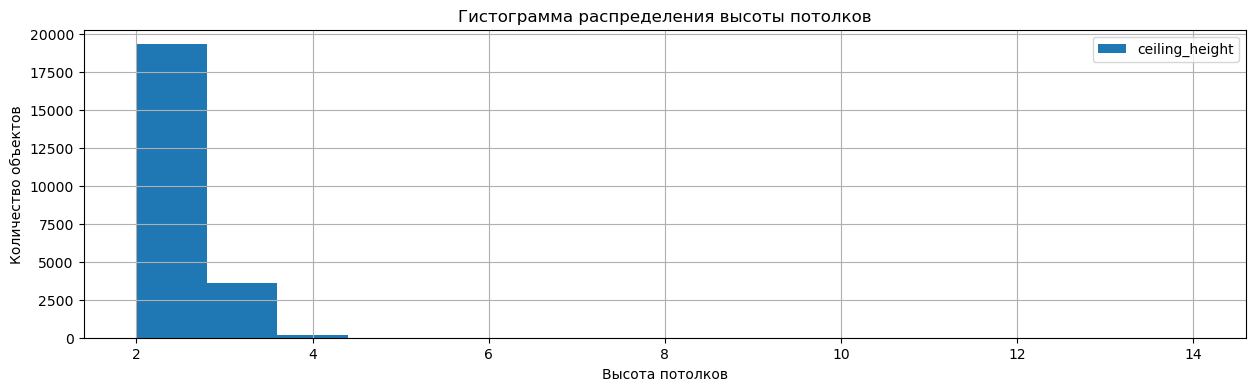

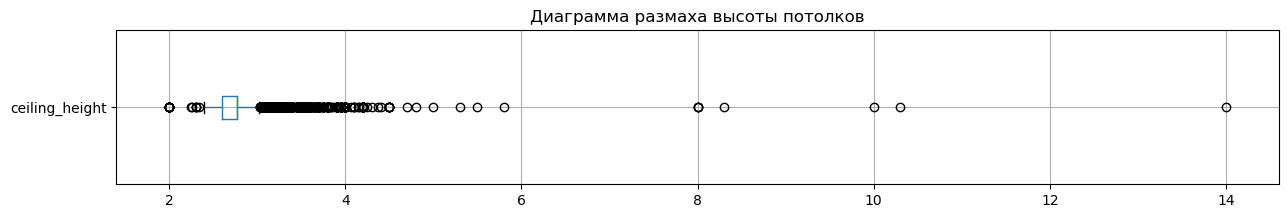

Статистика: count    23123.000000
mean         2.740192
std          0.240571
min          2.000000
25%          2.600000
50%          2.771499
75%          2.771499
max         14.000000
Name: ceiling_height, dtype: float64


In [95]:
#Построим гистограммы для высоты потолков после обработки аномалий
data['ceiling_height'].plot(kind = 'hist', title = 'Гистограмма распределения высоты потолков', xlabel = 'Высота потолков',\
                           ylabel = 'Количество объектов', bins = 15, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха высоты потолков')
plt.show();

print('Статистика:', data['ceiling_height'].describe())

После удаления аномалий средние значения не поменялись, разброс значений уменьшился в 5 раз (с 1 м до 0,2 м).
Остался объект со странным значением высоты потолка 14 м. Вообще есть двухуровневые квартиры с высотой потолка 8 м, про СПБ не знаю, но в Подмосковье такие квартиры достаточно популярны. По логике удалить нужно квартиры с высотой потолка более 8 м, т к судя про графику и статистике это единичные экземпляры. Удалим объекты с высотой потолка более 8 м.

In [96]:
data = data.loc[data['ceiling_height']<=8]
print('Статистика:', data['ceiling_height'].describe())


Статистика: count    23119.000000
mean         2.738823
std          0.215196
min          2.000000
25%          2.600000
50%          2.771499
75%          2.771499
max          8.000000
Name: ceiling_height, dtype: float64


***Этажность***

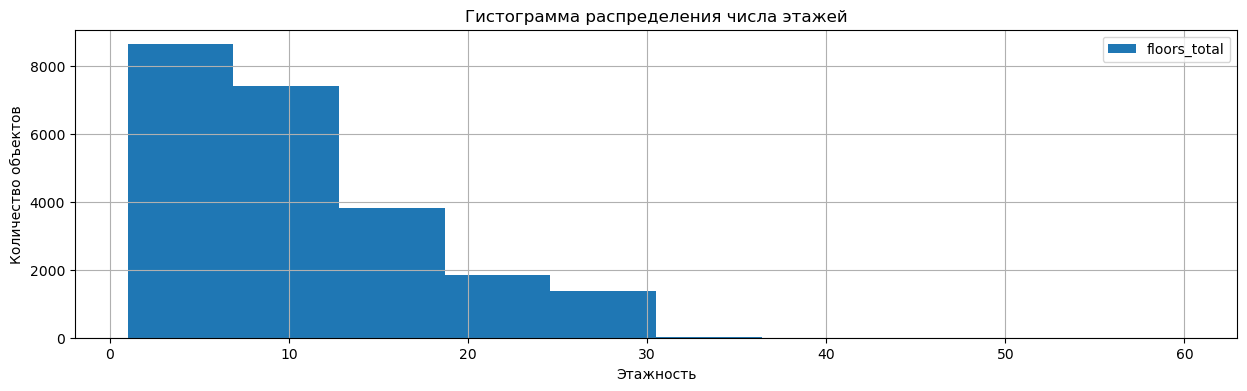

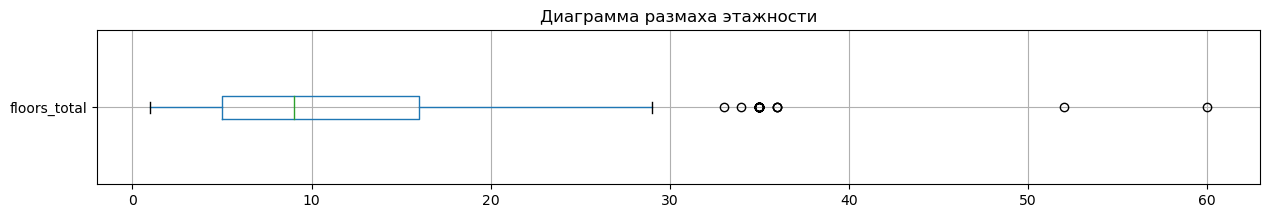

Статистика: count    23119.000000
mean        10.734547
std          6.593619
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [97]:
#Строим гистграммы для этажности
data['floors_total'].plot(kind = 'hist', title = 'Гистограмма распределения числа этажей', xlabel = 'Этажность',\
                           ylabel = 'Количество объектов', bins = 10, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха этажности')
plt.show();

print('Статистика:', data['floors_total'].describe())

In [98]:
print('99,8% всех значений находится ниже значения ', data['floors_total'].quantile(0.998), 'этажей')

99,8% всех значений находится ниже значения  28.0 этажей


In [99]:
#уберем строки со значением этажности выше 28 м
data = data.loc[data['floors_total'] <=28]

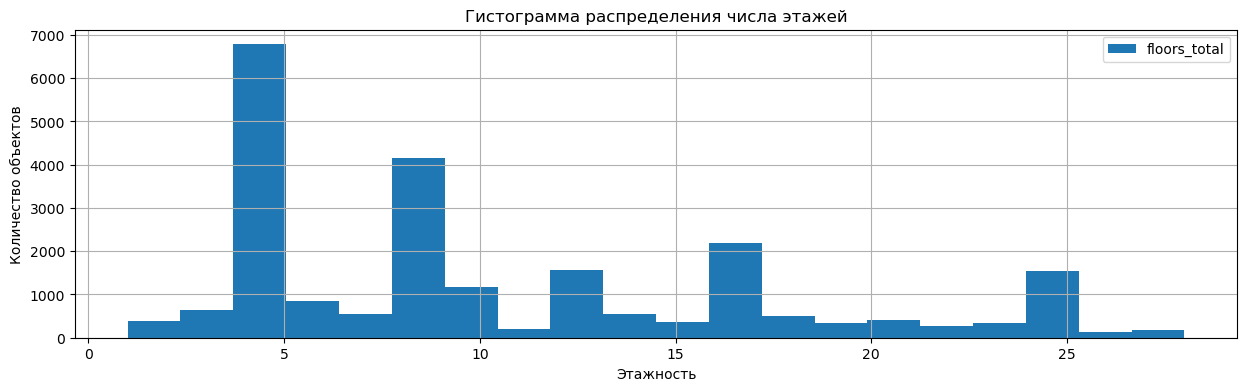

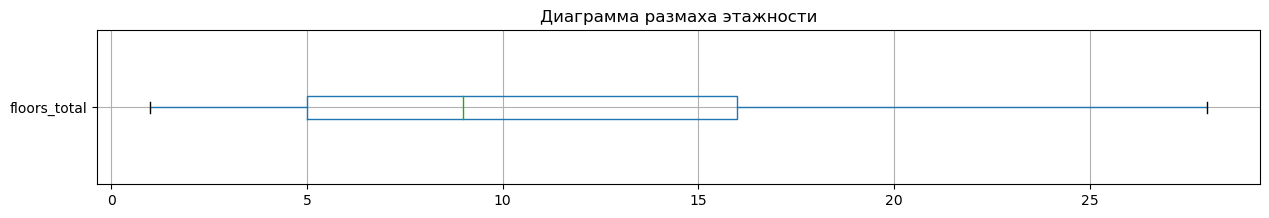

Статистика: count    23088.000000
mean        10.700407
std          6.528800
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64


In [101]:
#строим гистограмму по обновленным данным
data['floors_total'].plot(kind = 'hist', title = 'Гистограмма распределения числа этажей', xlabel = 'Этажность',\
                           ylabel = 'Количество объектов', bins = 20, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха этажности')
plt.show();

print('Статистика:', data['floors_total'].describe())

Видим 2 пика: наиболее часто встречающиеся этажности - 5 этажей (~5,8 тыс. объектов), примерно на треть меньше объектов в 9-этажных домах. 

***Расстяние до центра***

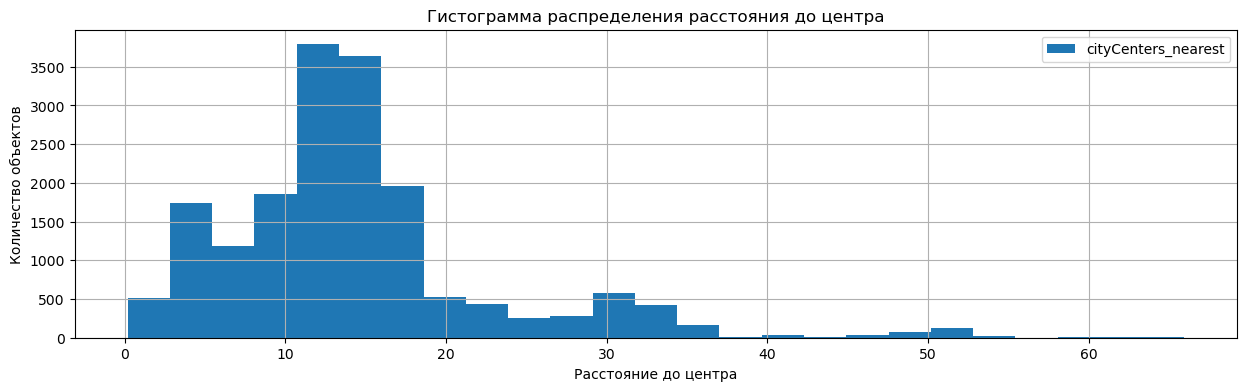

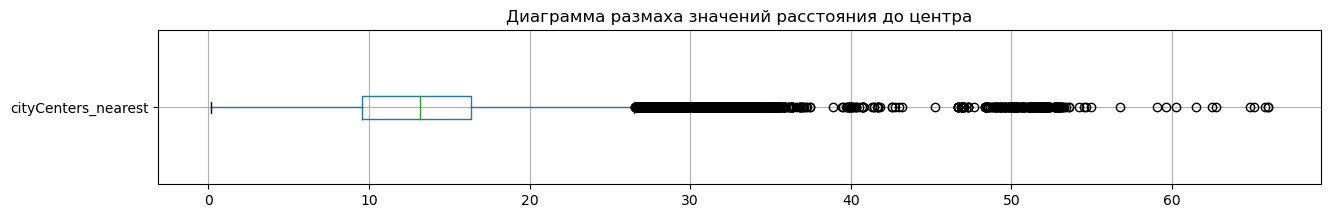

Статистика: count    17642.000000
mean        14.324037
std          8.560633
min          0.181000
25%          9.538000
50%         13.180500
75%         16.333000
max         65.968000
Name: cityCenters_nearest, dtype: float64


In [103]:
#Строим гистграммы для расстояния до центра города
data['cityCenters_nearest'].plot(kind = 'hist', title = 'Гистограмма распределения расстояния до центра',\
                                 xlabel = 'Расстояние до центра', ylabel = 'Количество объектов',\
                                 bins = 25, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['cityCenters_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояния до центра')
plt.show();

print('Статистика:', data['cityCenters_nearest'].describe())

Видно два пика - на расстоянии 12 км и 50 км. Нельзя сказать, что далекие расстояния это аномалия, скорее всего, на таком расстоянии находятся послеки с элитной недвижимостью, которая пользуется спросом в определенной нише. Я бы не стала здесь ничего удалять.

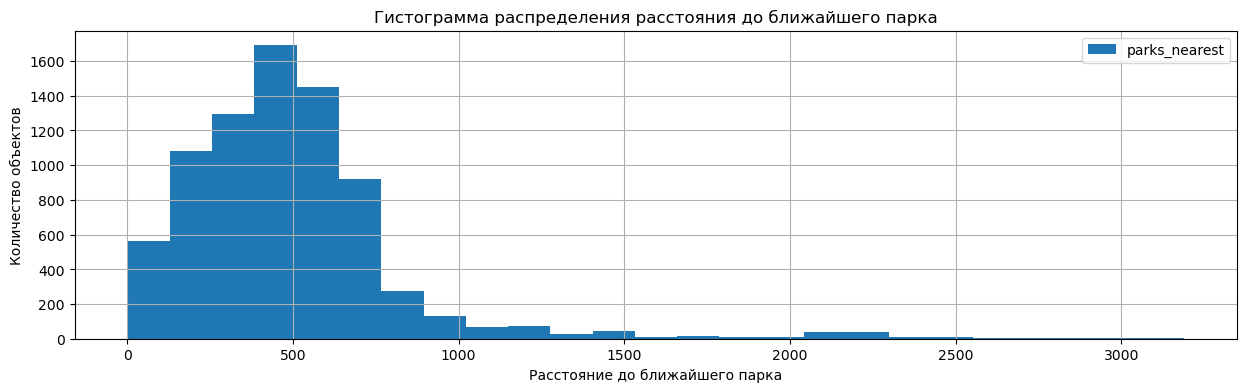

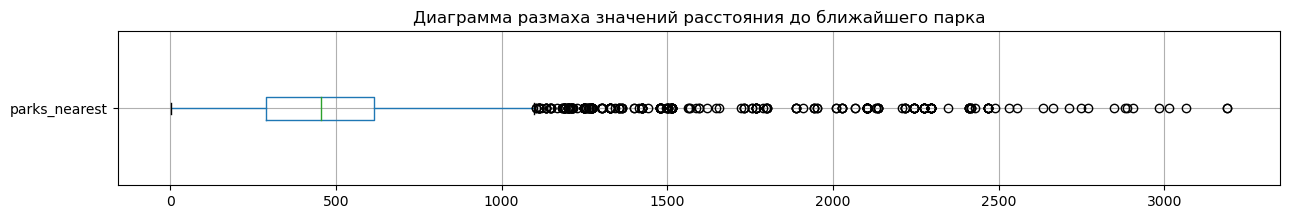

Статистика: count    7762.000000
mean      493.914197
std       344.230772
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [104]:
#Строим гистграммы для расстояния до ближайшего парка
data['parks_nearest'].plot(kind = 'hist', title = 'Гистограмма распределения расстояния до ближайшего парка',\
                                 xlabel = 'Расстояние до ближайшего парка', ylabel = 'Количество объектов',\
                                 bins = 25, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['parks_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений расстояния до ближайшего парка')
plt.show();

print('Статистика:', data['parks_nearest'].describe())


Количество строк с заполненными данными - это, скорее всего, строки для городов, где наличие парка поблизости актуально.
В послеках, расположенных за городом, наличие парка рядом не критично. Видим, что максимальное расстояние до парка - 3,2 км, это адекватный, не аномальный параметр, поэтому удалять здесь никаких объектов не нужно.


***Срок продажи квартиры***

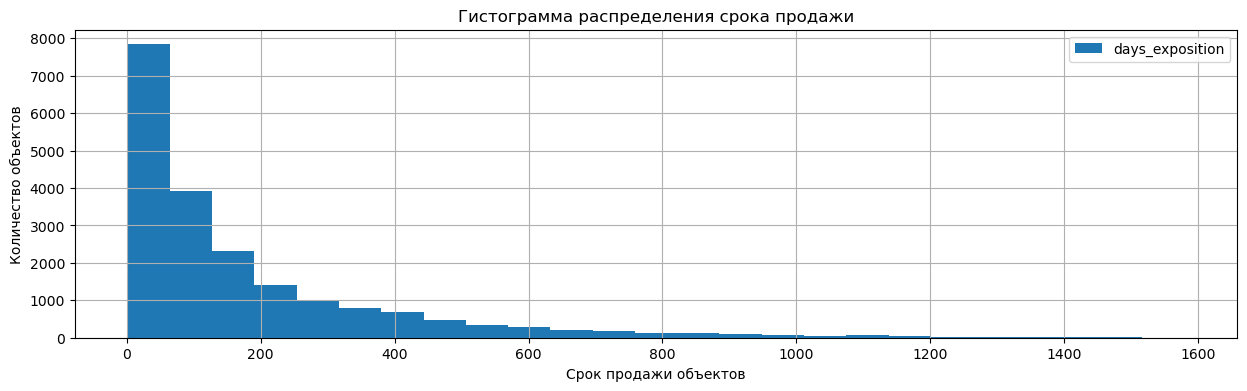

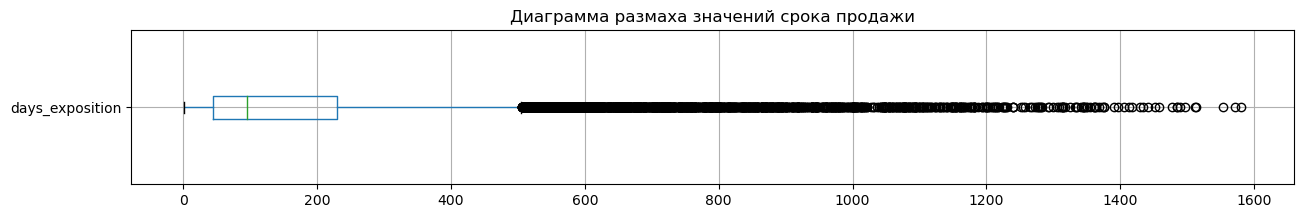

Статистика: count       20027.0
mean     179.470315
std       218.02925
min             1.0
25%            45.0
50%            95.0
75%           229.0
max          1580.0
Name: days_exposition, dtype: Float64
<class 'pandas.core.frame.DataFrame'>
Index: 23088 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23088 non-null  int64         
 1   last_price            23088 non-null  float64       
 2   total_area            23088 non-null  float64       
 3   first_day_exposition  23088 non-null  datetime64[ns]
 4   rooms                 23088 non-null  int64         
 5   ceiling_height        23088 non-null  float64       
 6   floors_total          23088 non-null  int64         
 7   living_area           23088 non-null  float64       
 8   floor                 23088 non-null  int64         
 9   is_apartment          23088 non-null  bool 

In [105]:
#Строим гистграммы для срока продажи квартиры
data['days_exposition'].plot(kind = 'hist', title = 'Гистограмма распределения срока продажи',\
                                 xlabel = 'Срок продажи объектов', ylabel = 'Количество объектов',\
                                 bins = 25, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений срока продажи')
plt.show();

print('Статистика:', data['days_exposition'].describe())
data.info()

Видим, что после срока 800 дней хвост гистограммы близок к нулю. Посмотрим 99,7% квантиль распределения.

In [106]:
print('99,7% квартир продаются быстрее ', int(data['days_exposition'].quantile(0.997)), 'дней.')

99,7% квартир продаются быстрее  1256 дней.


Оставим 99,7% квартир, срок продажи которых составляет менее 1256 дней. В данных видим, что есть рекордные сроки продажи 1 и 2 дня. Посмотрим количество объектов со сроком продажи  менее 3 дней.

In [107]:
data_exp = data.loc[data['days_exposition']<3]
data_exp.shape

(4, 28)

Количество объектов со сроком продажи менее 3 дней - 4 объекта, можно их удалить.

In [108]:
data = data.loc[((data['days_exposition']<1256)&(data['days_exposition']>3))|(data['days_exposition'].isna())]

data.shape

(22869, 28)

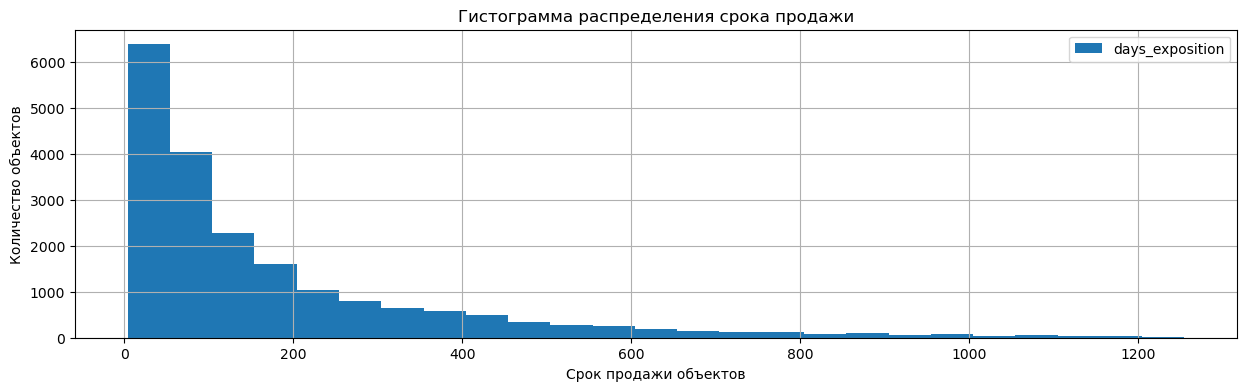

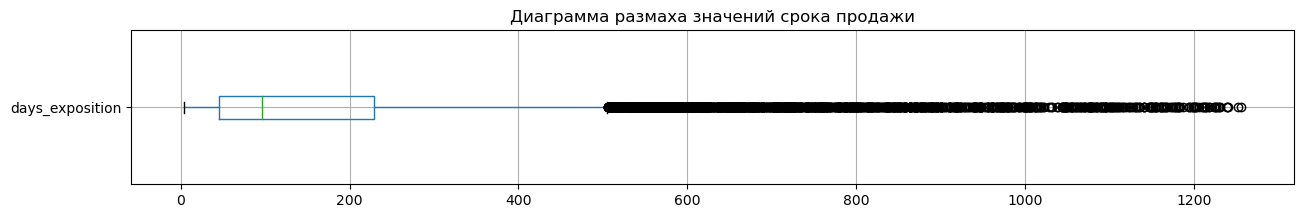

Статистика: count       19808.0
mean     177.212338
std       208.38461
min             4.0
25%            45.0
50%            96.0
75%           229.0
max          1255.0
Name: days_exposition, dtype: Float64


In [109]:

#Строим гистграммы для срока продажи квартиры по обновленным данным
data['days_exposition'].plot(kind = 'hist', title = 'Гистограмма распределения срока продажи',\
                                 xlabel = 'Срок продажи объектов', ylabel = 'Количество объектов',\
                                 bins = 25, figsize = (15, 4), grid = True, legend = True)
plt.show();

#Посмотрим разброс распределения
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений срока продажи')
plt.show();

print('Статистика:', data['days_exposition'].describe())

В исходных данных наблюдался большой разброс сроков продажи - от 1 дня до 4 лет. Медианный срок объявления при этом составлял 90 дней. Вероятно,было достаточно большое количество квартир, которые в силу разных причин продавались очень долго. После удаления строк с не стандартно долгими сроками продажи, сохранив 99% объектов, мы уменьшили разброс значений, в результате чего снизился медианный срок продажи и максимальный срок продажи.
Глядя на гистограмму, можно сказать, что к быстрым продажам можно отнести продажи сроком до 50 дней, средний срок продажи - от 50 до 600 дней (в этом диапазоне кодличество квратира с такими сроками продажи падает), а медленными продажами - сроки, расположенные в "хвосте" гистограммы, это сроки  более 600 дней. Необычно долгие сроки продажи мы удалили, это продажи сроком более 1256 дней.

Посмотрим на число оставшихся после обработки аномалий данных и посчитаем процент потерь.

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22869 non-null  int64         
 1   last_price            22869 non-null  float64       
 2   total_area            22869 non-null  float64       
 3   first_day_exposition  22869 non-null  datetime64[ns]
 4   rooms                 22869 non-null  int64         
 5   ceiling_height        22869 non-null  float64       
 6   floors_total          22869 non-null  int64         
 7   living_area           22869 non-null  float64       
 8   floor                 22869 non-null  int64         
 9   is_apartment          22869 non-null  bool          
 10  studio                22869 non-null  bool          
 11  open_plan             22869 non-null  bool          
 12  kitchen_area          22869 non-null  float64       
 13  balcony              

После обработки аномальных и выбивающихся значений сохранилось 96,5% строк (22869), избавились от 4,5% данных. 

Проверим еще раз датасет на аномалии, посмотрим минимальные, максимальные значения по основным показателям.

In [111]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,869.00","22,869.00","22,869.00","19,808.00","22,869.00","22,869.00","22,869.00","22,869.00","22,869.00"
min,0.00,17.00,2.00,4.00,0.45,10.08,5.00,1.00,1.00
max,6.00,240.00,8.00,"1,255.00",44.50,133.40,42.80,27.00,28.00


Аномалий не осталось.

**Корреляционный анализ**

***Корреляция между общей площадью и ценой***

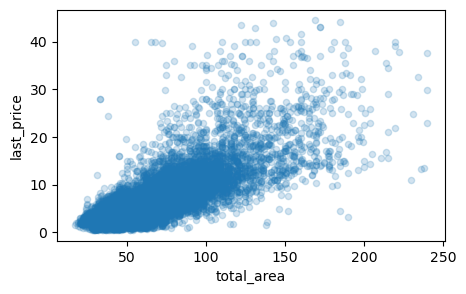

Коээфициент корреляции между показателями общей площади и цены  0.77


In [121]:
#Построим график зависимости цены от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', figsize = (5, 3), alpha=0.2)
plt.show()

#Посчитаем коээфициент корреляции между значениями общей площади и цены
kor_price_total_area = round(data['total_area'].corr(data['last_price']), 2)
print('Коээфициент корреляции между показателями общей площади и цены ', kor_price_total_area)

Наблюдаем устойчивый тренд роста цены при увеличении общей площади. Имеют место резко выделяющиеся из общего тренда значения (слишком высокая или слишком низкая цена по сравнению со средней для этой площади), но это вполне объяснимо влиянием других факторов, такик как качество ремонта, состояние дома, удаленность от центра, наличие рядом вредных производств и пр. Коээфициент корреляции достаточно высокий - 77%.

***Корреляция между жилой площадью и ценой***

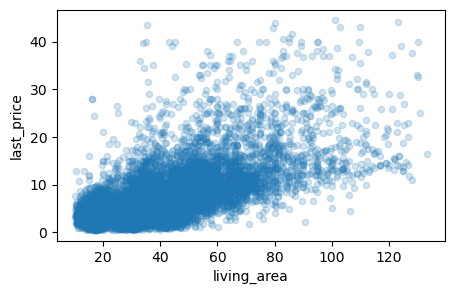

Коээфициент корреляции между показателями жилой площади и цены  0.67


In [120]:
#Построим график зависимости цены от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', figsize = (5, 3), alpha=0.2)
plt.show()

#Посчитаем коээфициент корреляции между значениями жилой площади и цены
kor_price_living_area = round(data['living_area'].corr(data['last_price']), 2)
print('Коээфициент корреляции между показателями жилой площади и цены ', kor_price_living_area)

Тренд роста цены с увеличением жилой площади аналогичен, но корреляция чуть меньше, чем между общей площадью и жилой. В базе много объектов, расположенных за городом, поэтому общая площадь влияет на цену больше: за городом большое значение имеет площадь подсобных и других нежилых помещений, таких как терасса, кладовые для хранения инвентаря, котельная и пр.

***Корреляция между площадью кухни и ценой***

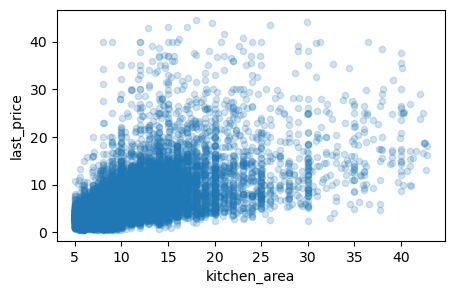

Коээфициент корреляции между показателями площади кухни и цены  0.59


In [119]:
#Построим график зависимости цены от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize = (5, 3), alpha=0.2)
plt.show()

#Посчитаем коээфициент корреляции между значениями площади кухни и цены
kor_price_kitchen_area = round(data['kitchen_area'].corr(data['last_price']), 2)
print('Коээфициент корреляции между показателями площади кухни и цены ', kor_price_kitchen_area)

Наблюдается тренд зависимости стоимости квартиры от площади кухни, но корреляция еще ниже. На графике виден рост цены при росте площади кухни до 20 м2, далее видим, что после этого значения устойчивого тренда роста стоимости квартиры при увеличении площади кухни нет.


***Корреляция между числом комнат и ценой***

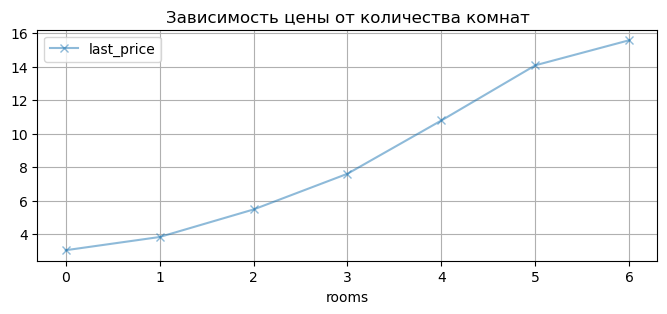

Коээфициент корреляции между показателями количества комнат и цены  0.48


In [117]:
#Построим график зависимости цены от количества комнат
data.pivot_table(index = 'rooms', values = 'last_price').plot(style='x-', title='Зависимость цены от количества комнат',\
                                                              figsize = (8, 3), alpha=0.5, grid=True, sharex=False)
plt.show()

#Посчитаем коээфициент корреляции между количеством комнат и цены
kor_price_rooms = round(data['rooms'].corr(data['last_price']), 2)
print('Коээфициент корреляции между показателями количества комнат и цены ', kor_price_rooms)

На графике видна явная зависимость между количеством комнат и ценой, в то время как коэффициент корреляции показывает не очень выоскую зависимость.

***Зависимость между этажностью и ценой***

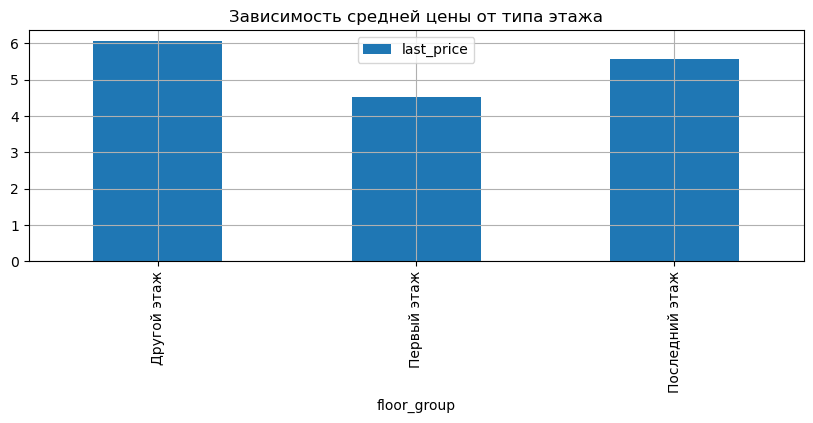

In [122]:
#Построим график зависимости цены от этажа, здесь нужен другой тип графика, т к фактор этажности не числовой
data.pivot_table(index='floor_group', values='last_price').plot( title='Зависимость средней цены от типа этажа',\
                                                                figsize=(10, 3), kind='bar', grid = True)
plt.show()

Стоимость квартир на первом этаже в среднем на 25% ниже объектов на других этажах. Цена квартир на последнем этаже ~на 7-8% превышает среднюю стоиомсть квартир на других этажах.

***Зависимость между ценой и сроком объявления***

<function matplotlib.pyplot.show(close=None, block=None)>

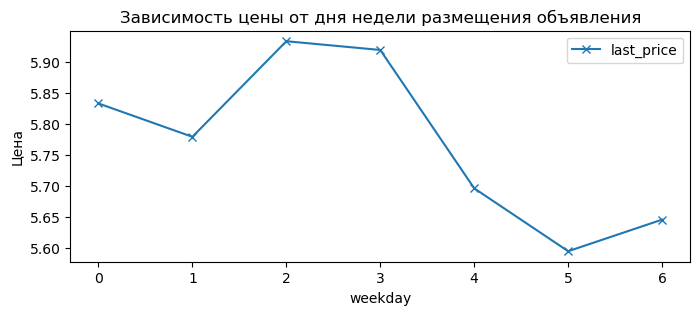

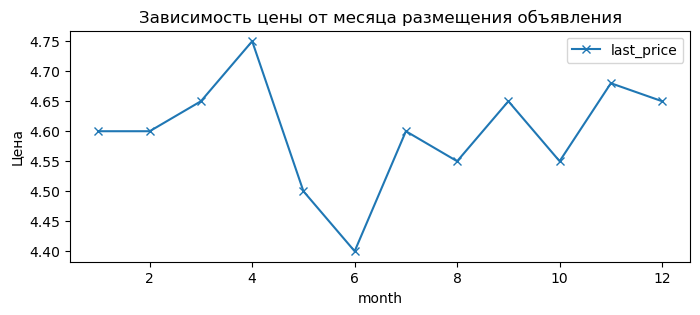

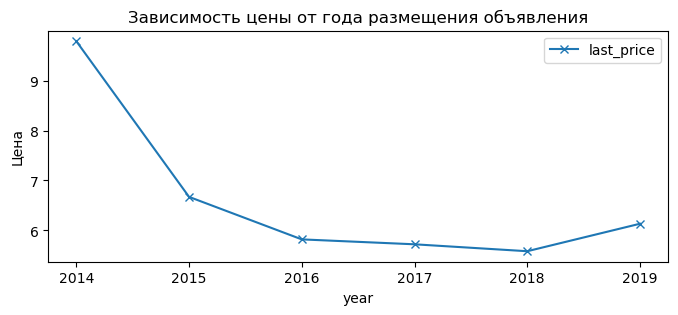

In [126]:
#Построим график зависимости цены срока объявления
data.pivot_table(index='weekday', values='last_price').plot(style='x-',\
                                                            title='Зависимость цены от дня недели размещения объявления',\
                                                            ylabel = 'Цена',
                                                            figsize=(8, 3))
plt.show
data.pivot_table(index='month', values='last_price', aggfunc = 'median').plot(style='x-',\
                                                    title='Зависимость цены от месяца размещения объявления',\
                                                                              ylabel = 'Цена',
                                                                              figsize=(8, 3))
plt.show
data.pivot_table(index='year', values='last_price').plot(style='x-',\
                                                         title='Зависимость цены от года размещения объявления',\
                                                         ylabel = 'Цена',
                                                         figsize=(8, 3))
plt.show

В будни дни стоимость квартиры почти не зависит от дня размещения, по воскресеньям видим явное снижение  цены.

Если говорить о корреляции между стоимостью и месяцем размещения, то максимальная стоимость наблюдается в объявлениях, размещенных в апреле и августе. Цена резко падает с апреля по июнь, к осени разко поднимается и далее снижается в течение зимнего периода.

Видим выраженный тренд снижения стоимости недвижимости с 2014 по 2018 год, в 2019 году наметился рост цен.

Сгруппируем данные по годам, посмотрим количество объявлений и среднюю площадь квартир по годам.

In [127]:
data.groupby('year').agg({'total_area': ['mean' , 'count']})

total_area      
           mean count
year                 
2014  80.948053   113
2015  65.630623  1091
2016  59.292588  2705
2017  57.987358  7925
2018  56.342147  8264
2019  57.067423  2771

Сгруппируем данные по годам, посмотрим количество объявлений и среднюю стоимость квартир по годам.

In [128]:
data.groupby('year').agg({'last_price': ['mean' , 'count']})

last_price      
           mean count
year                 
2014   9.787751   113
2015   6.671971  1091
2016   5.821368  2705
2017   5.723029  7925
2018   5.584435  8264
2019   6.134561  2771

Проанализировав динамику числа объявлений, среней площади продаваемых объектов и средней цены квартир, можно сделать вывод, что график зависимости цены от года объявления не отражает объективную картину. В 2014 году количество объявлений было в десятки раз меньше, чем в другие годы, при этом средняя площадь и средняя цена в 2014г были в среднем на 20% выше, чем в следующем 2015 году. Средняя цена с 2014 по 2018 на графике падает, в то время как в сводной таблице растет число объявлений, а среднее значение цены (используемая по умолчанию функция в сводных таблицах - среднее арифметическое) менятеся не значительно. Рост в 2019 году объясняется снижением числа объявлений. Построим график еще раз, задав функцию median.

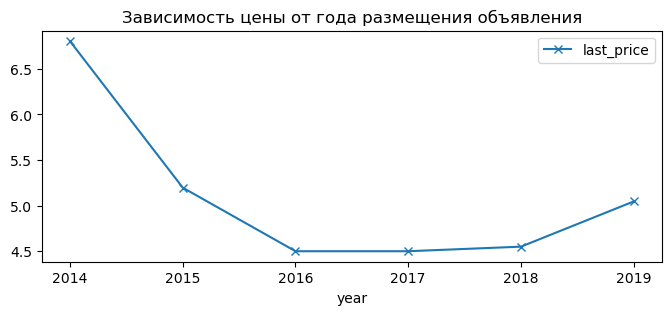

In [131]:
data.pivot_table(index='year', values='last_price', aggfunc = 'median').plot(style='x-',\
                                                    title='Зависимость цены от года размещения объявления', figsize=(8, 3))
plt.show;

Видим, что после замены функции в сводной таблице динамика средней цены не поменялась. Делаем вывод, что при анализе необходимо не только смотреть на графики, но изучать другие показатели, такие как число объявлений, среднюю цену и среднюю площадь по годам. 

***Матрица корреляций***

In [132]:
#Построим корреляционную матрицу по основным показателям
data_factors = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'weekday', 'month', 'year']]
print(data_factors.head())
print()
print(data_factors.corr())

   last_price  total_area  living_area  kitchen_area  weekday  month  year
0      13.000       108.0         51.0          25.0        3      3  2019
1       3.350        40.4         18.6          11.0        1     12  2018
2       5.196        56.0         34.3           8.3        3      8  2015
4      10.000       100.0         32.0          41.0        1      6  2018
5       2.890        30.4         14.4           9.1        0      9  2018

              last_price  total_area  living_area  kitchen_area   weekday  \
last_price      1.000000    0.772041     0.668956      0.593778 -0.014625   
total_area      0.772041    1.000000     0.932249      0.578909 -0.013360   
living_area     0.668956    0.932249     1.000000      0.354973 -0.010560   
kitchen_area    0.593778    0.578909     0.354973      1.000000 -0.012596   
weekday        -0.014625   -0.013360    -0.010560     -0.012596  1.000000   
month           0.005628    0.009624     0.002973      0.013820  0.011277   
year      

Для наглядности изобразим матрицу корреляций с помощью тепловой карты.

<Axes: >

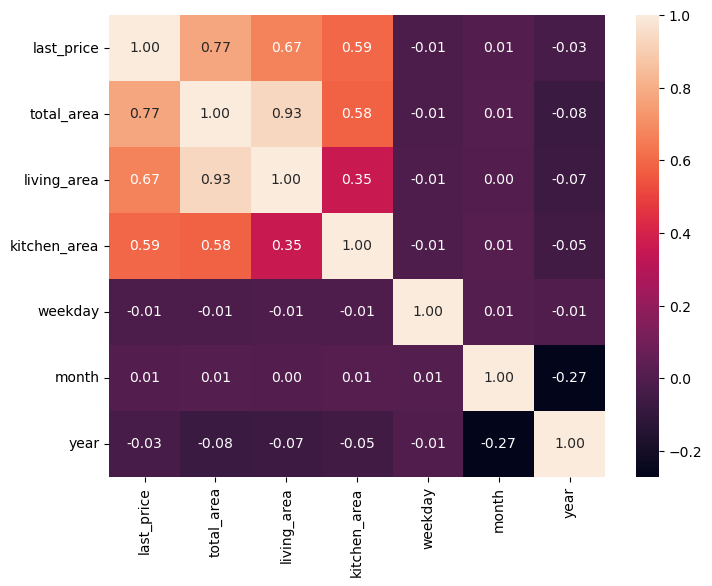

In [136]:
plt.figure(figsize = (8, 6))
sns.heatmap(data_factors.corr(), annot=True, fmt='.2f') 

В матрице корреляций видно, что цена максимально зависит от параметра общей площади, чуть меньше зависимость от жилой площади, еще меньше стоиомтьс объекта зависит от площади кухни. Наблюдается тенденция снижения стоимости квартир по годам. Зависимость от остальных пармаетров выражена слабо.

In [137]:
#Выделим пункты с максимальным количеством объявлений
locality_data = data.pivot_table(index='locality_name', values='last_price', aggfunc=('count'))
print(locality_data.head())
locality_data.columns = ['count']
locality_data_sorted = locality_data.sort_values(by = 'count', ascending=False)
print(locality_data_sorted.head(10))

               last_price
locality_name            
 Агалатово              4
 Аро                    3
 Батово                 9
 Бегуницы              17
 Белогорка             10
                   count
locality_name           
Санкт-Петербург    15060
посёлок Мурино       540
посёлок Шушары       433
Всеволожск           396
Пушкин               354
Колпино              333
посёлок Парголово    320
Гатчина              299
 Кудрово             296
Выборг               233


In [138]:
#Из исходной таблицы выделим строки с населенными пунктами с максимальным числом объявлений
localities_choosen = ['Санкт-Петербург',\
                      'посёлок Мурино', \
                      'посёлок Шушары',\
                      'Всеволожск', \
                      'Колпино', 'Пушкин', 'Гатчина', 'деревня Кудрово', 'Выборг', 'Петергоф' ]
data_locality_grouped = data.loc[data['locality_name'].isin(localities_choosen)]
#print(data_locality_grouped.head(10))
data_locality_grouped = data_locality_grouped.pivot_table(index = 'locality_name', values = 'one_metr_price', \
                                                          aggfunc = ['count', 'mean', 'median'])
data_locality_grouped.columns = ['count', 'mean', 'median']
data_locality_grouped['median'] = round(data_locality_grouped['median'], 1)
data_locality_grouped['mean'] = round(data_locality_grouped['mean'], 1)
data_locality_grouped.sort_values(by = 'median', ascending = False)



,count,mean,median
locality_name,,,
Санкт-Петербург,15060,111540.7,104305.1
Пушкин,354,102942.3,99865.7
посёлок Мурино,540,85216.9,85145.7
Петергоф,200,84728.6,82068.2
посёлок Шушары,433,78615.6,76923.1
Колпино,333,75405.2,74725.3
Гатчина,299,68836.5,67924.5
Всеволожск,396,68643.4,65789.5
Выборг,233,58189.4,58307.7


In [139]:
data_locality_grouped.reset_index(inplace= True )
data_locality_grouped.index
data_locality_grouped.head()

,locality_name,count,mean,median
0,Всеволожск,396,68643.4,65789.5
1,Выборг,233,58189.4,58307.7
2,Гатчина,299,68836.5,67924.5
3,Колпино,333,75405.2,74725.3
4,Петергоф,200,84728.6,82068.2


В ячейке выше собраны населенные пункты с наибольшим числом объявлений. Видим, что подавляющее большинство объявлений - в городе Санкт-Петербург. Медианное значение стоимости квадратного метра в среднем на 3-6% ниже средней арифметической стоимости. Самые высокие цены квадратного  метра - в Санкт-Петербурге (104 тыс.руб. за метр) и Пушкине (100 тыс.руб.). Цены в других городах снижаются вместе со снижением количества объявлений. Минимальная цена из данной выборки в Выборге (58 тыс.руб.).

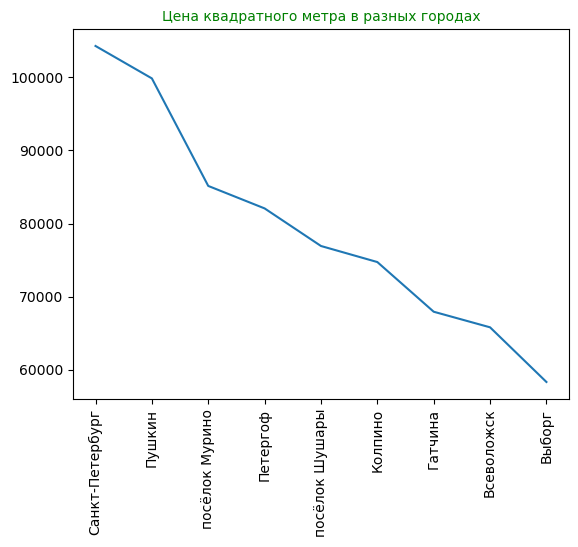

In [142]:
data_locality_grouped = data_locality_grouped.sort_values(by = 'median', ascending = False)
x = data_locality_grouped['locality_name']
y = data_locality_grouped['median']
plt.xticks(rotation = 90)
plt.plot(x, y)

 
plt.title("Цена квадратного метра в разных городах", fontsize=10, color="green")
 
plt.show()

In [143]:
data['center_distance'].describe()

count    17457.000000
mean        14.319872
std          8.562081
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: center_distance, dtype: float64

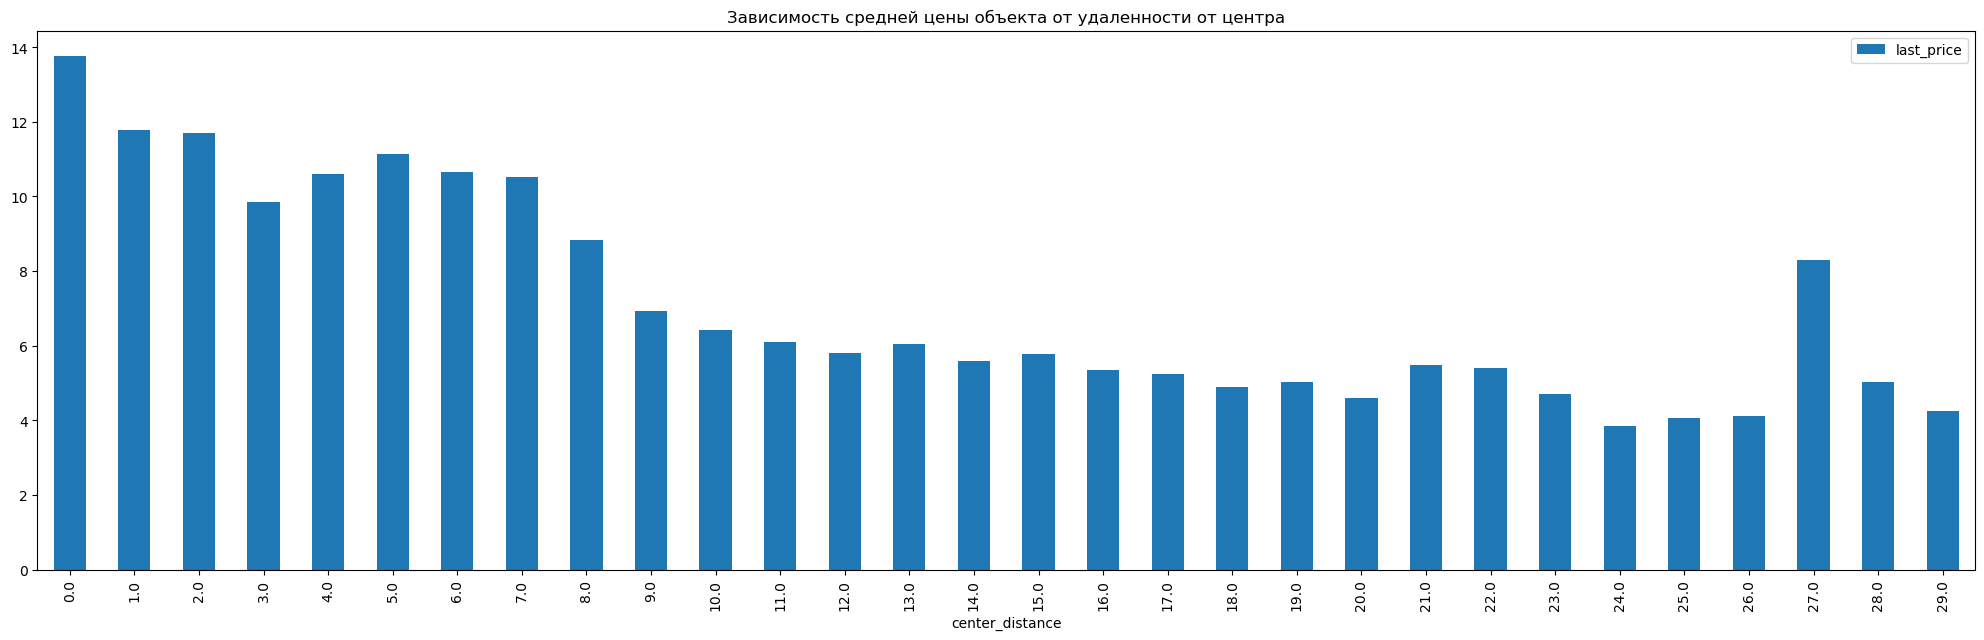

In [149]:
#Выделим из общей таблицы данные только по Санкт-Петербургу.
data_spb = data.loc[data['locality_name'] =='Санкт-Петербург']
data_spb.pivot_table(index = 'center_distance', values = 'last_price', aggfunc = 'mean')\
.plot(kind = 'bar', title = 'Зависимость средней цены объекта от удаленности от центра', figsize = (25, 7))
plt.show;

Посмотрим зависимость медианной цены от удаленности от центра.

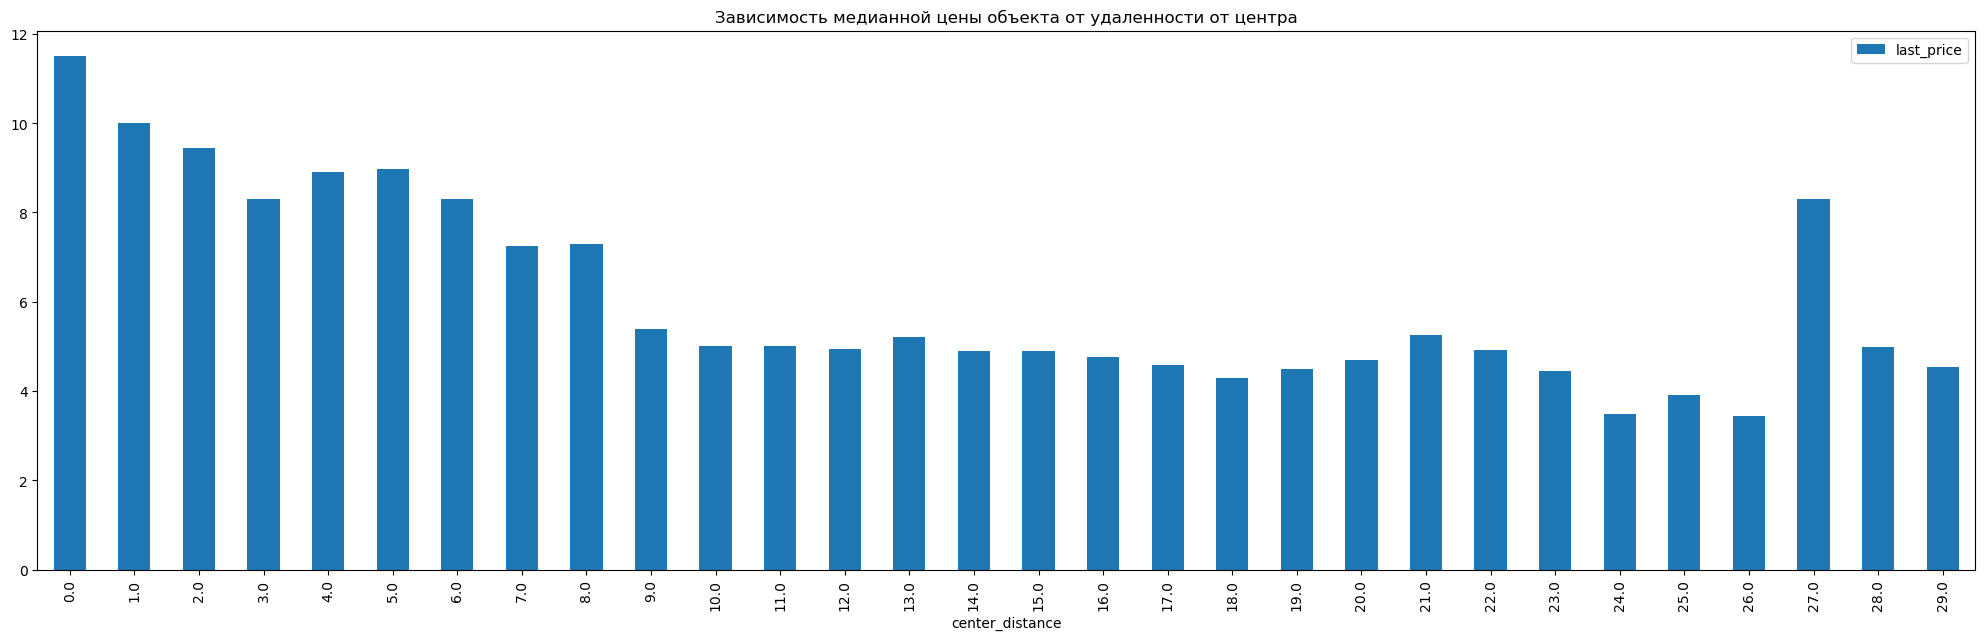

In [150]:
data_spb.pivot_table(index = 'center_distance', values = 'last_price', aggfunc = 'median').\
plot(kind = 'bar', title = 'Зависимость медианной цены объекта от удаленности от центра', figsize = (25, 7))
plt.show; 

Посмотрим число объявлений на каждом километре удаленности от центра.

<Axes: title={'center': 'Зависимость количества объявлений от удаленности от центра'}, xlabel='center_distance'>

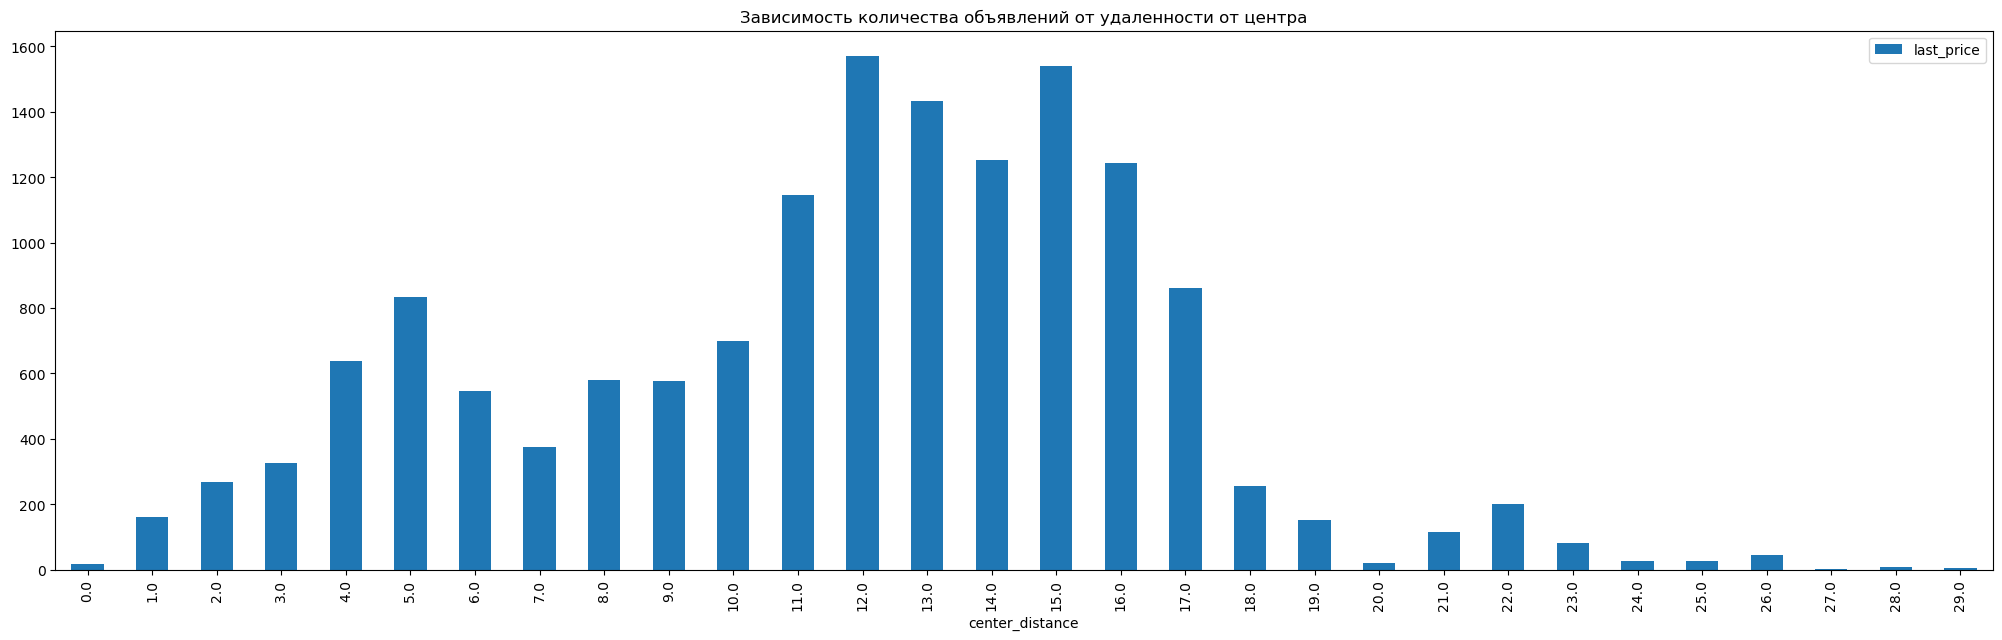

In [151]:
data_spb.pivot_table(index = 'center_distance', values = 'last_price', aggfunc = 'count').\
plot(kind = 'bar', title = 'Зависимость количества объявлений от удаленности от центра', figsize = (25, 7))

Сделаем сводную таблицу, сравнив показатели средней арифметичсекой, медианной цен и количества объявлений.

In [152]:
data_spb.pivot_table(index = 'center_distance', values = 'last_price', aggfunc = ['mean','median', 'count'])

,mean,median,count
,last_price,last_price,last_price
center_distance,,,
0.0,13.757588,11.500000,17
1.0,11.774720,10.000000,161
2.0,11.691795,9.450000,268
3.0,9.857572,8.299500,326
4.0,10.614894,8.900000,639
5.0,11.148881,8.980000,833
6.0,10.660121,8.300000,547
7.0,10.521884,7.250000,374


Посмотрим число объявлений на каждом километре удаленности от центра.

В самом центре СПБ средняя стоимотсть квартир составаляет 11,5 млн.руб. В радиусе 1-2 км от центра стоимость квартир нменого ниже: 9,5-10 млн.руб. в среднем 7,3 млн руб. Средняя стоиомсть квартир в радиусе 3-8 км снижается до ~8,2 млн руб. На расстоянии 9-16 км средняя стоимость составляет 5 млн руб., для расстояния 17-23 км. средняя стоимость равна 4,5 млн.руб., 24-26 км. - 3,5 млн.руб. На расстоянии свыше 26 км. оценивать средние цены не показательно, тк количество объявлений на этих расстояних слишком мало. Пик средней цены на графике на расстоянии 27 км объясняется тем, что там всего 2 объявления: скорее всего, это достаточно большие объекты с высокой стоимостью. На расстояниях 28-29 км число объявлений 6 и 7 соответственно - слишком маленькая выборка для анализа статистики.


Посмотрим статистику этажности в центре города и на максимальных расстояниях от центра.

In [153]:
data_spb.pivot_table(index=['center_distance', 'floor_group'], values = 'last_price', aggfunc = 'count').iloc[9:18]


last_price
center_distance floor_group               
3.0             Другой этаж            201
                Первый этаж             51
                Последний этаж          74
4.0             Другой этаж            458
                Первый этаж             76
                Последний этаж         105
5.0             Другой этаж            630
                Первый этаж             75
                Последний этаж         128

In [154]:
data_spb.pivot_table(index=['center_distance', 'floor_group'], values = 'last_price', aggfunc = 'count').iloc[80:89]


last_price
center_distance floor_group               
26.0            Последний этаж          12
27.0            Другой этаж              1
                Последний этаж           1
28.0            Другой этаж              4
                Первый этаж              2
                Последний этаж           1
29.0            Другой этаж              1
                Первый этаж              4
                Последний этаж           1

***Общий вывод***

***1)*** В результате анализа выявлено, что основными факторами, влияющими на стоимость жилой недвижимости, являются общая и жилая площади (коэффициенты корреляции 77% и 67% для общей и жилой площади соответственно). Общая площадь в среднем влияет  на цену больше, так как в почти 60% объявлений - объекты в области, где помимо жилой площади большое значение имеют другие типы помещений (терассы, склад для хранения инвентаря, котельная и пр). 

***2)***  Значение имеет этаж: стоимость квратир на первом этаже в среднем на 25% ниже стоимости квартир на других этажах, квартиры на последнем этаже без соседей сверху оцениваются в среднем выше на 7-8%.

***3)*** Самые высокие цены квадратного метра в насленных пунктах с максимальным числом объявлений - в Санкт-Петербурге (104 тыс.) и Пушкине (100 тыс.). Самые низкие цены - во Всеволжске (66 тыс.) и Выборге (58 тыс.).

***4)*** В Санкт-Петербурге важным фактором, влияющим на стоимость объектов недвижимости, является расстояние до центра города. В центре города средня стоимость квартир составляет 9-11  млн. руб. к окраинам средняя цена снижается до 3,5  млн.руб. Объективно оценить среднюю цену на расстоянии 27-29 км по имеющимся данным проблематично, т к количество объявлений здесь не достаточно для формирования статистики (выборка 2, 6 и 7 объектов на расстояниях 27, 28 и 29 км соответственно).


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.